In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
from scipy import stats

In [3]:
pd.set_option('display.max_columns', None)

# Define Churn

In [4]:
active = pd.read_csv('data/active.csv')
active.head()

,driver_id,num_day,date_index
0,002be0ffdc997bd5c50703158b7c2491,90,"[0, 2, 3, 4, 7, 9, 11, 12, 13, 14, 15, 16, 17,..."
1,007f0389f9c7b03ef97098422f902e62,90,"[0, 10, 26, 29, 31, 38, 50, 51, 65, 68, 77, 85]"
2,011e5c5dfc5c2c92501b8b24d47509bc,83,"[0, 1, 3, 12, 21, 33, 40, 42, 44, 50, 51, 68]"
3,0152a2f305e71d26cc964f8d4411add9,65,"[2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19,..."
4,01674381af7edd264113d4e6ed55ecda,59,"[0, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18,..."


In [5]:
def get_array(l, s):
    date_list = [0] * l
    s = eval(s)
    if len(s) > 0:
        for e in s:
            date_list[e] = 1
    return date_list

In [6]:
active['date_list'] = active.apply(lambda x: get_array(x.num_day, x.date_index), axis=1)
active

,driver_id,num_day,date_index,date_list
0,002be0ffdc997bd5c50703158b7c2491,90,"[0, 2, 3, 4, 7, 9, 11, 12, 13, 14, 15, 16, 17,...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ..."
1,007f0389f9c7b03ef97098422f902e62,90,"[0, 10, 26, 29, 31, 38, 50, 51, 65, 68, 77, 85]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,011e5c5dfc5c2c92501b8b24d47509bc,83,"[0, 1, 3, 12, 21, 33, 40, 42, 44, 50, 51, 68]","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,0152a2f305e71d26cc964f8d4411add9,65,"[2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19,...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, ..."
4,01674381af7edd264113d4e6ed55ecda,59,"[0, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18,...","[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,62,"[0, 1, 2, 3, 9, 10, 11, 12, 13, 14, 15, 16, 17...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
833,ff714a67ba8c6a108261cd81e3b77f3a,91,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
834,fff482c704d36a1afe8b8978d5486283,80,"[0, 4, 7, 10, 11, 12, 13, 17, 18, 19, 20, 26, ...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ..."
835,fffecccc49436c5389075b13209f0dfa,52,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [7]:
active.describe()

,num_day
count,837.000000
mean,68.985663
std,14.063162
min,43.000000
25%,58.000000
50%,70.000000
75%,82.000000
max,91.000000


In [8]:
trailing_zeros = 0
def check_consecutive_zeros(x, l):
    i = 0
    s = -1
    while i < len(l) - x - trailing_zeros:
        if l[i:i+x] == [0] * x:
            s = i
            break
        i += 1
    
    if s == -1:
        return 0
    else:
        if max(l[i+x:]) == 0:
            return 1
        else:
            return 0

In [9]:
def append_zeros(l):
    return l + [0] * trailing_zeros

In [10]:
def get_result():
    result = []
    data = active[active['num_day'] >= 76]
    data['date_list'] = data.apply(lambda x: append_zeros(x.date_list), axis=1)
    for l in range(1, 31):
        data['check'] = data.apply(lambda x: check_consecutive_zeros(l, x.date_list), axis=1)
        result.append({'l': l, 'churn': data['check'].sum(), 'active': len(data['check']) - data['check'].sum()})
    return result

In [11]:
result = get_result()

/var/folders/1l/7rdgkfvs7h3cgjr2m2yj7ck80000gn/T/ipykernel_82443/2292651219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_list'] = data.apply(lambda x: append_zeros(x.date_list), axis=1)
/var/folders/1l/7rdgkfvs7h3cgjr2m2yj7ck80000gn/T/ipykernel_82443/2292651219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['check'] = data.apply(lambda x: check_consecutive_zeros(l, x.date_list), axis=1)


In [12]:
result

[{'l': 1, 'churn': 7, 'active': 304},
 {'l': 2, 'churn': 13, 'active': 298},
 {'l': 3, 'churn': 18, 'active': 293},
 {'l': 4, 'churn': 31, 'active': 280},
 {'l': 5, 'churn': 41, 'active': 270},
 {'l': 6, 'churn': 45, 'active': 266},
 {'l': 7, 'churn': 53, 'active': 258},
 {'l': 8, 'churn': 58, 'active': 253},
 {'l': 9, 'churn': 62, 'active': 249},
 {'l': 10, 'churn': 67, 'active': 244},
 {'l': 11, 'churn': 69, 'active': 242},
 {'l': 12, 'churn': 70, 'active': 241},
 {'l': 13, 'churn': 71, 'active': 240},
 {'l': 14, 'churn': 72, 'active': 239},
 {'l': 15, 'churn': 75, 'active': 236},
 {'l': 16, 'churn': 78, 'active': 233},
 {'l': 17, 'churn': 78, 'active': 233},
 {'l': 18, 'churn': 79, 'active': 232},
 {'l': 19, 'churn': 75, 'active': 236},
 {'l': 20, 'churn': 73, 'active': 238},
 {'l': 21, 'churn': 74, 'active': 237},
 {'l': 22, 'churn': 71, 'active': 240},
 {'l': 23, 'churn': 73, 'active': 238},
 {'l': 24, 'churn': 72, 'active': 239},
 {'l': 25, 'churn': 72, 'active': 239},
 {'l': 26,

In [13]:
churn_df = pd.DataFrame(result)
churn_df

,l,churn,active
0,1,7,304
1,2,13,298
2,3,18,293
3,4,31,280
4,5,41,270
5,6,45,266
6,7,53,258
7,8,58,253
8,9,62,249
9,10,67,244


In [14]:
churn_df['churn_rate'] = churn_df['churn'] / (churn_df['churn'] + churn_df['active'])

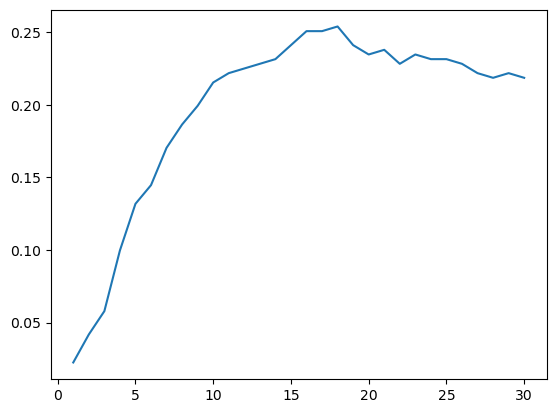

In [15]:
plt.plot(churn_df['l'], churn_df['churn_rate'])

# Driver Churn

## Load Data

In [16]:
df = pd.read_csv('data/driver_feature.csv')
df.head()

,driver_id,driver_onboard_date,first_drive,last_drive,num_drive,day_drive,min_ride_distance,max_ride_distance,total_ride_distance,min_ride_duration,max_ride_duration,total_ride_duration,avg_distance_per_day,avg_duration_per_day,avg_distance_per_drive,avg_duration_per_drive,min_acceptance_duration,max_acceptance_duration,avg_acceptance_duration,min_arrival_duration,max_arrival_duration,avg_arrival_duration,min_wait_duration,max_wait_duration,avg_wait_duration,avg_earning_per_ride,min_earning_ride,max_earning_ride,earnings_per_active_day,ride_freq_during_active,avg_primetime_multiplier,num_rides_in_1st_30days,n_days_after_onboarding,n_days_after_last_drive,n_days_to_first_drive,churn
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00.000000 UTC,2016-03-29,2016-06-23,277,277,606,109289,1740287,117,4524,221238,31076.553571,3950.678571,6282.624549,798.693141,0.0,345.0,8.407942,17.0,677.0,172.703971,0.0,60.0,5.516245,10.284251,4.000000,78.746694,50.870315,3.220930,19.404332,112,89.0,3.0,0.0,0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00.000000 UTC,2016-03-29,2016-06-22,31,31,548,10028,117531,200,1227,20497,9794.250000,1708.083333,3791.322581,661.193548,1.0,78.0,11.838710,40.0,350.0,177.064516,0.0,59.0,4.967742,8.296637,4.993610,14.602911,21.432978,0.364706,20.161290,11,89.0,4.0,0.0,0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00.000000 UTC,2016-04-05,2016-06-12,34,34,1148,86080,269653,223,4620,29205,22471.083333,2433.750000,7930.970588,858.970588,1.0,20.0,7.294118,45.0,590.0,223.176471,0.0,41.0,4.147059,11.351242,4.310401,65.760606,32.161853,0.500000,19.852941,12,82.0,14.0,0.0,0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00.000000 UTC,2016-04-25,2016-06-26,191,191,22,31789,1471239,24,3157,174521,36780.975000,4363.025000,7702.821990,913.722513,0.0,756.0,14.198953,10.0,695.0,229.089005,0.0,60.0,10.952880,10.935574,4.000000,29.293182,52.217368,3.080645,10.732984,56,64.0,0.0,2.0,0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00.000000 UTC,2016-04-29,2016-06-24,375,375,673,72609,3123644,145,4996,357443,78091.100000,8936.075000,8329.717333,953.181333,0.0,1335.0,12.528000,4.0,1280.0,216.440000,0.0,60.0,8.256000,11.479660,4.000000,54.340290,107.621815,6.696429,12.533333,188,58.0,2.0,0.0,0


In [17]:
df.drop(columns=['n_days_after_last_drive','num_drive','total_ride_distance','total_ride_duration','min_ride_duration','avg_distance_per_day', 'avg_duration_per_day','avg_distance_per_drive', 'avg_duration_per_drive'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driver_id                 937 non-null    object 
 1   driver_onboard_date       854 non-null    object 
 2   first_drive               844 non-null    object 
 3   last_drive                844 non-null    object 
 4   day_drive                 937 non-null    int64  
 5   min_ride_distance         937 non-null    int64  
 6   max_ride_distance         937 non-null    int64  
 7   max_ride_duration         937 non-null    int64  
 8   min_acceptance_duration   844 non-null    float64
 9   max_acceptance_duration   844 non-null    float64
 10  avg_acceptance_duration   844 non-null    float64
 11  min_arrival_duration      844 non-null    float64
 12  max_arrival_duration      844 non-null    float64
 13  avg_arrival_duration      844 non-null    float64
 14  min_wait_d

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day_drive,937.0,197.245464,181.064827,0.000000,39.000000,200.000000,316.000000,919.000000
min_ride_distance,937.0,481.580576,485.692371,-2.000000,14.000000,400.000000,842.000000,2060.000000
max_ride_distance,937.0,56522.545358,33580.233621,6421.000000,36623.000000,56497.000000,70539.000000,724679.000000
max_ride_duration,937.0,3705.852721,1980.429776,877.000000,2568.000000,3370.000000,4335.000000,28204.000000
min_acceptance_duration,844.0,0.708531,1.092571,0.000000,0.000000,0.000000,1.000000,5.000000
max_acceptance_duration,844.0,291.052133,360.803584,11.000000,77.000000,193.500000,368.250000,5028.000000
avg_acceptance_duration,844.0,11.895784,4.147474,5.044444,9.509146,11.054378,13.264484,41.250000
min_arrival_duration,844.0,24.472749,28.819362,-1.000000,6.000000,12.000000,35.000000,226.000000
max_arrival_duration,844.0,1169.862559,1593.533603,324.000000,771.500000,1038.500000,1314.250000,40397.000000
avg_arrival_duration,844.0,262.914398,82.323531,100.041667,207.223375,244.728755,299.082908,659.111111


In [20]:
df.duplicated().sum()

0

## EDA

In [21]:
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))

churn
0    638
1    299
Name: count, dtype: int64
churn
0    0.680896
1    0.319104
Name: proportion, dtype: float64


In [22]:
df.select_dtypes([np.int64,np.float64]).columns

Index(['day_drive', 'min_ride_distance', 'max_ride_distance',
       'max_ride_duration', 'min_acceptance_duration',
       'max_acceptance_duration', 'avg_acceptance_duration',
       'min_arrival_duration', 'max_arrival_duration', 'avg_arrival_duration',
       'min_wait_duration', 'max_wait_duration', 'avg_wait_duration',
       'avg_earning_per_ride', 'min_earning_ride', 'max_earning_ride',
       'earnings_per_active_day', 'ride_freq_during_active',
       'avg_primetime_multiplier', 'num_rides_in_1st_30days',
       'n_days_after_onboarding', 'n_days_to_first_drive', 'churn'],
      dtype='object')

In [23]:
numerical_feature = ['day_drive', 'min_ride_distance', 'max_ride_distance',
       'max_ride_duration', 'min_acceptance_duration',
       'max_acceptance_duration', 'avg_acceptance_duration',
       'min_arrival_duration', 'max_arrival_duration', 'avg_arrival_duration',
       'min_wait_duration', 'max_wait_duration', 'avg_wait_duration',
       'avg_earning_per_ride', 'min_earning_ride', 'max_earning_ride',
       'earnings_per_active_day', 'ride_freq_during_active',
       'avg_primetime_multiplier', 'num_rides_in_1st_30days',
       'n_days_after_onboarding', 'n_days_to_first_drive']

### Plug distributions of numerical features for all drivers

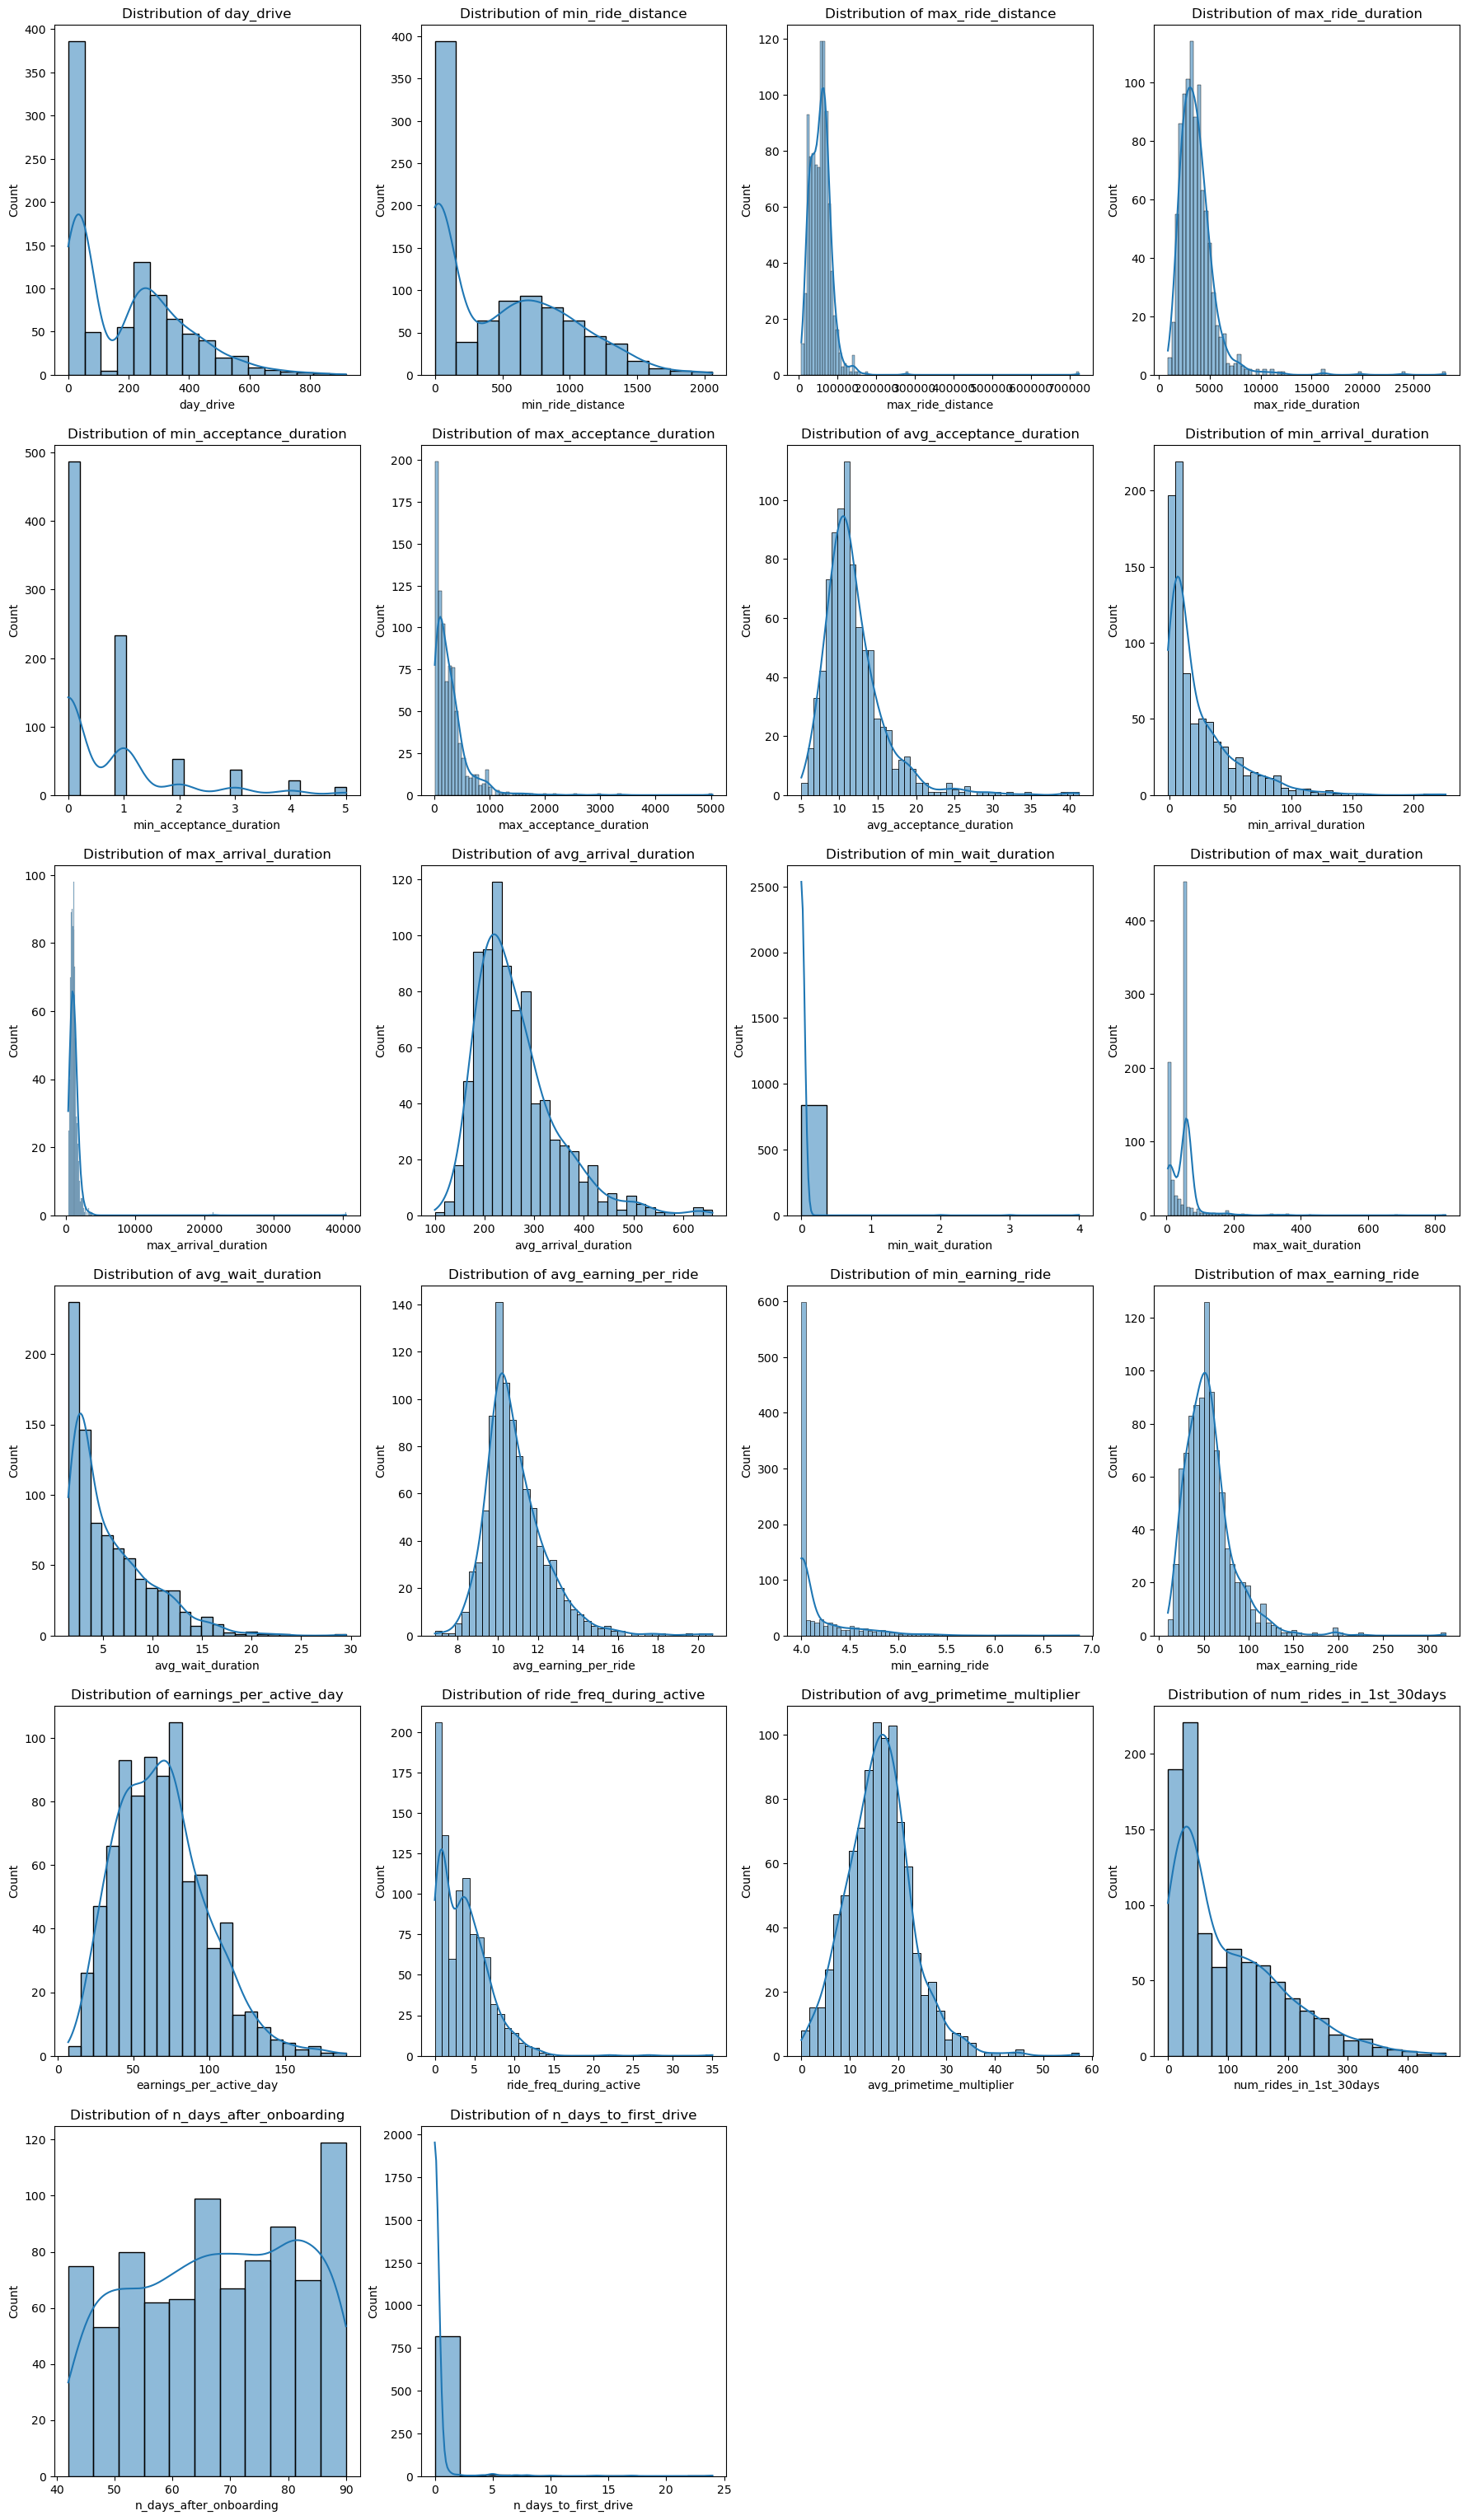

In [24]:
cols = 4
rows = 9

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 6.5*rows))

# Flatten axes array for easy iteration if more than 1 row and 1 column
if rows * cols > 1:
    axes = axes.flatten()

# Plot distributions for each column
for i, col in enumerate(numerical_feature):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

### Compare distributions of each feature of churn vs retained drivers

In [25]:
def plot_numerical(df, column_to_break): 
    levels = df[column_to_break].unique().tolist()
    for col in numerical_feature:  
        print('DISTRIBUTION OF {}'.format(str.upper(col)))
        fig, axes = plt.subplots(1,len(levels), figsize = (20, 5))
        axe = axes.ravel()

        for i, per in enumerate(levels):
            sns.histplot(df[(df[col] >= df[col].quantile(0.001)) & (df[col] <= df[col].quantile(0.999)) & (df[column_to_break] == per)][col],
                         kde=True, 
                         ax=axe[i],
                         bins=100,
                         color='#4472c4ff')
            axe[i].set_title(f'DISTRIBUTION OF {i}')
            plt.gcf().axes[i].yaxis.get_major_formatter().set_scientific(False)
            plt.gcf().axes[i].xaxis.get_major_formatter().set_scientific(False)
            
        plt.tight_layout()
        plt.show()

DISTRIBUTION OF DAY_DRIVE


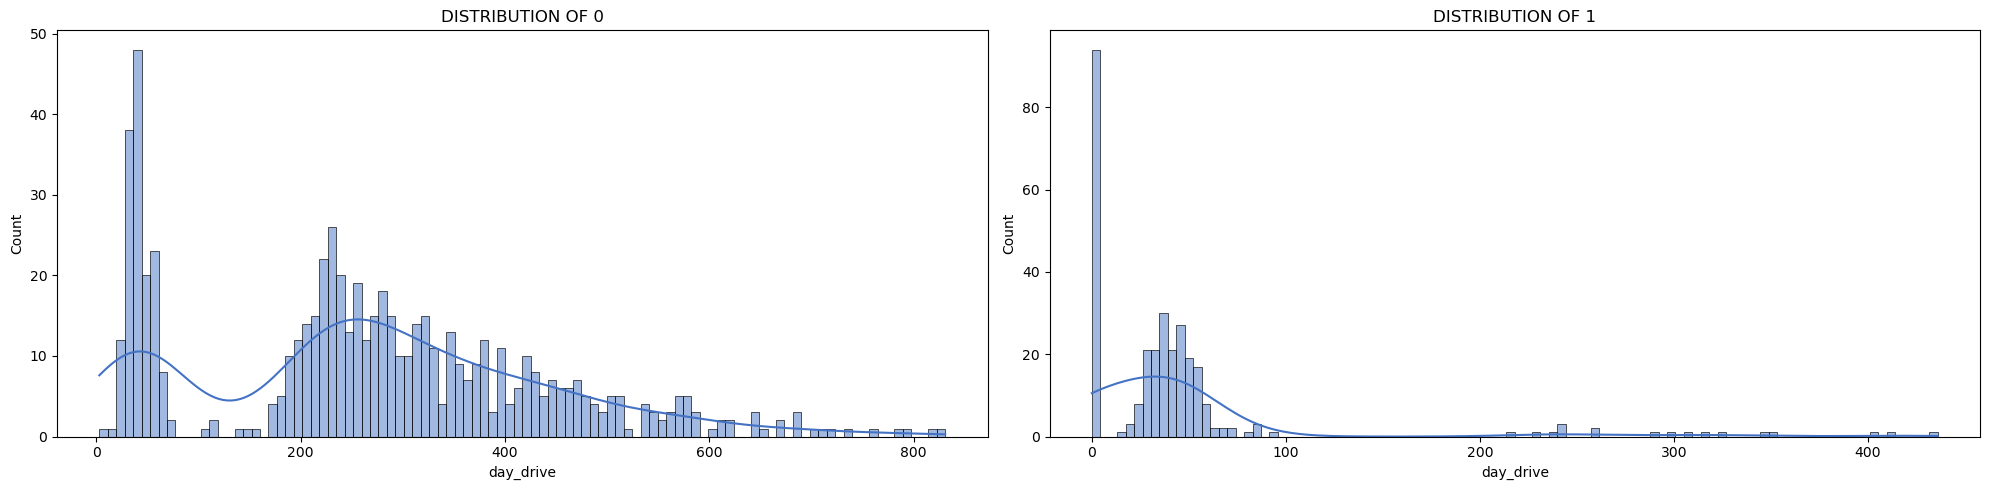

DISTRIBUTION OF MIN_RIDE_DISTANCE


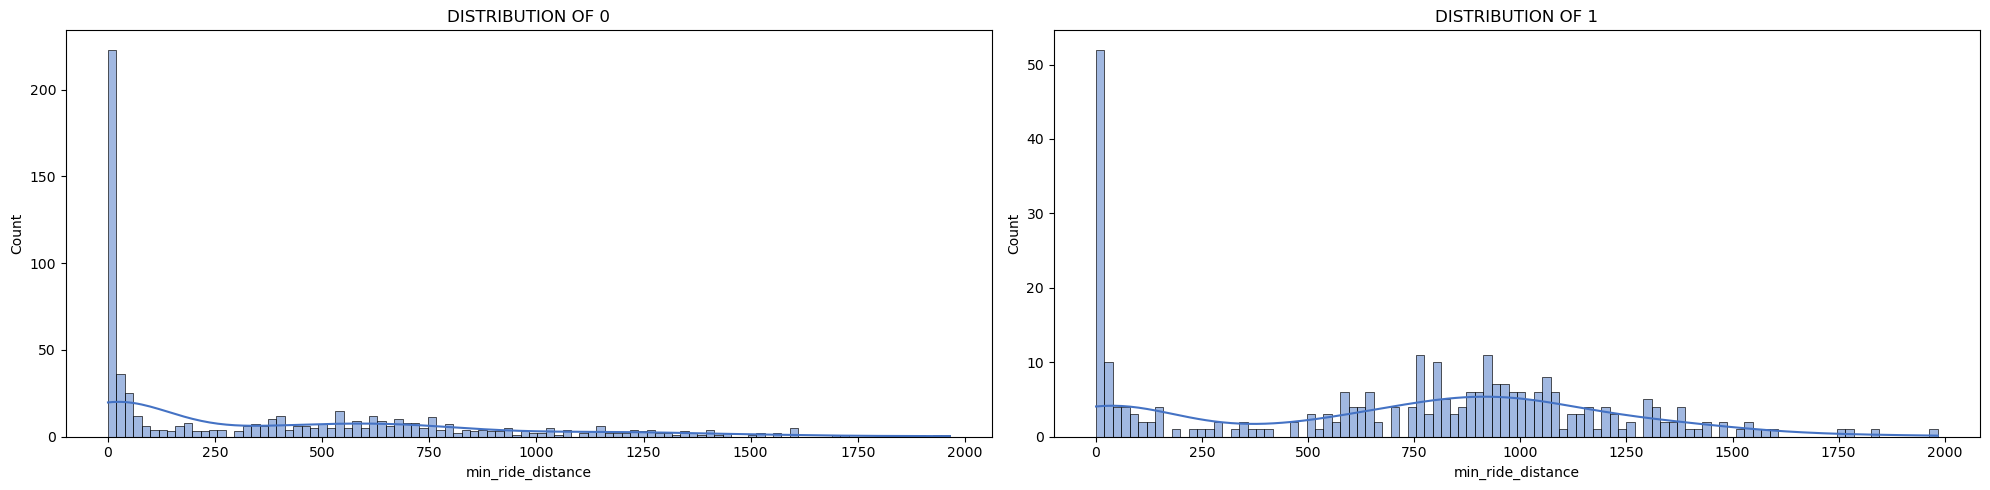

DISTRIBUTION OF MAX_RIDE_DISTANCE


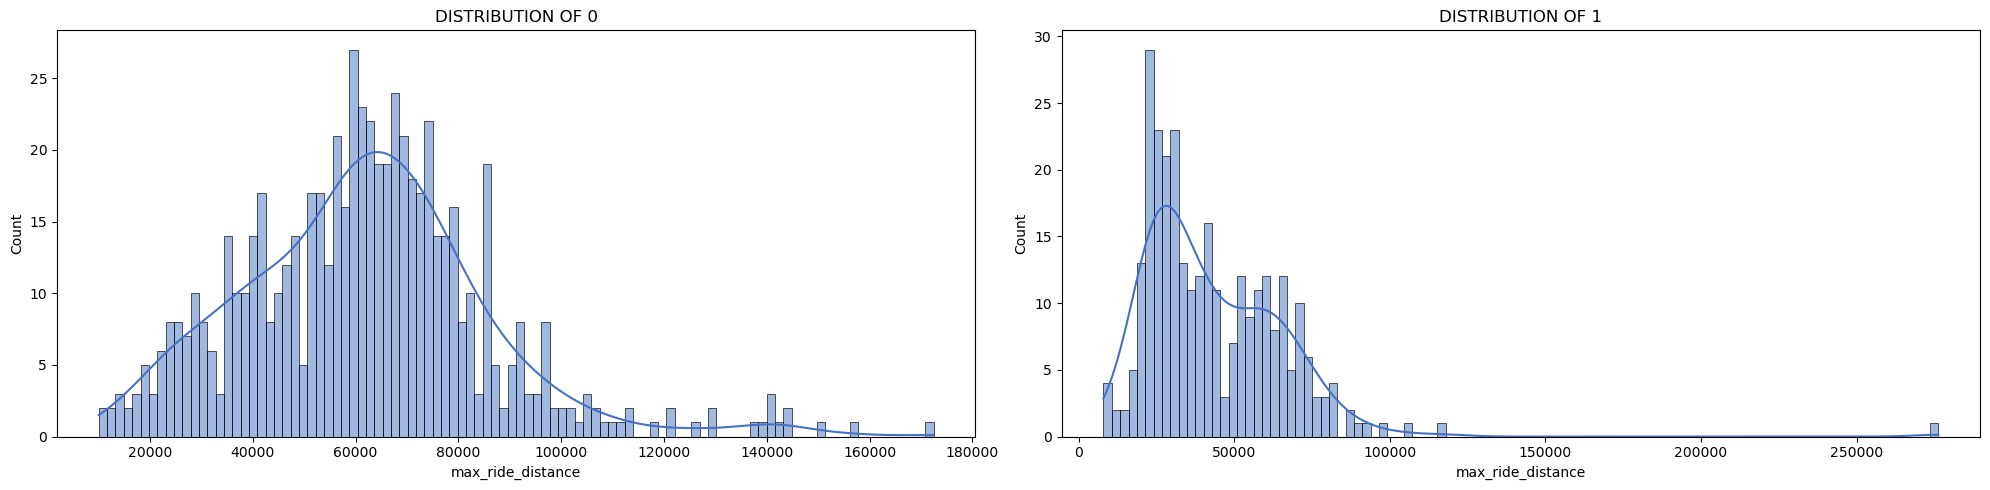

DISTRIBUTION OF MAX_RIDE_DURATION


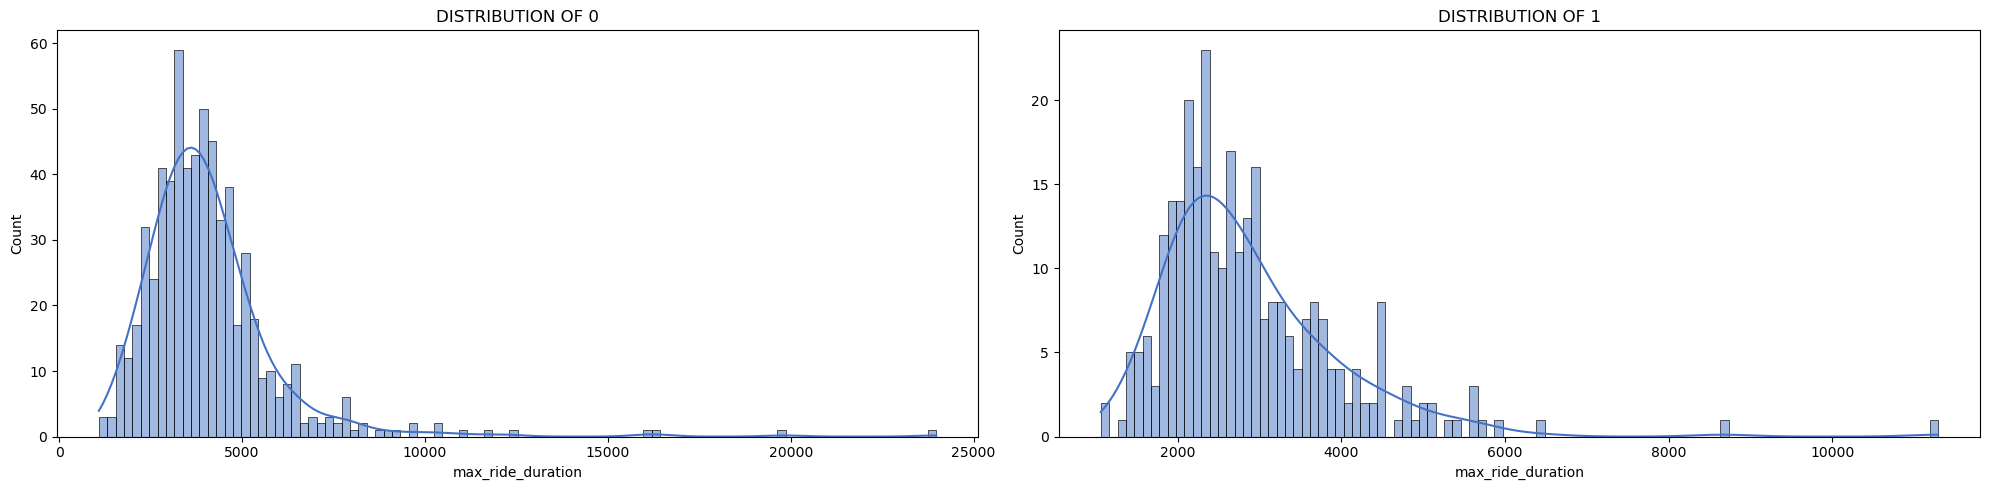

DISTRIBUTION OF MIN_ACCEPTANCE_DURATION


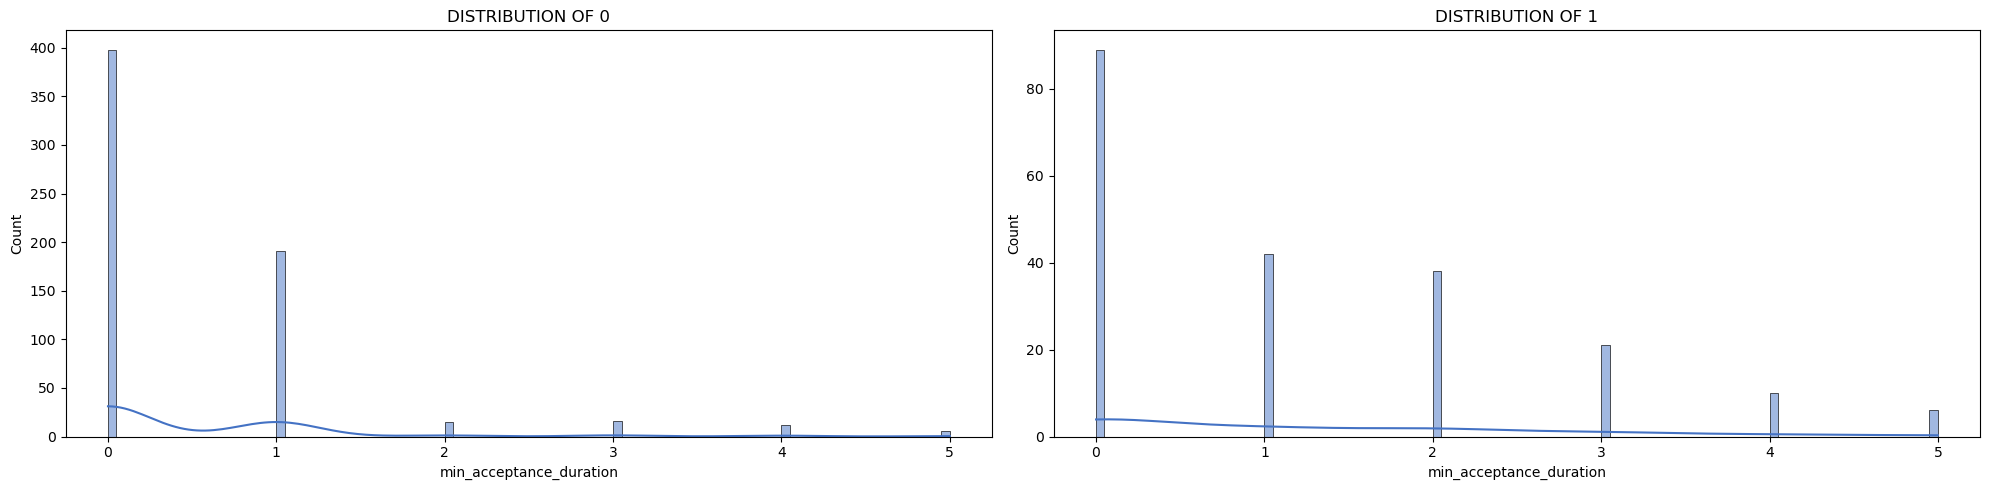

DISTRIBUTION OF MAX_ACCEPTANCE_DURATION


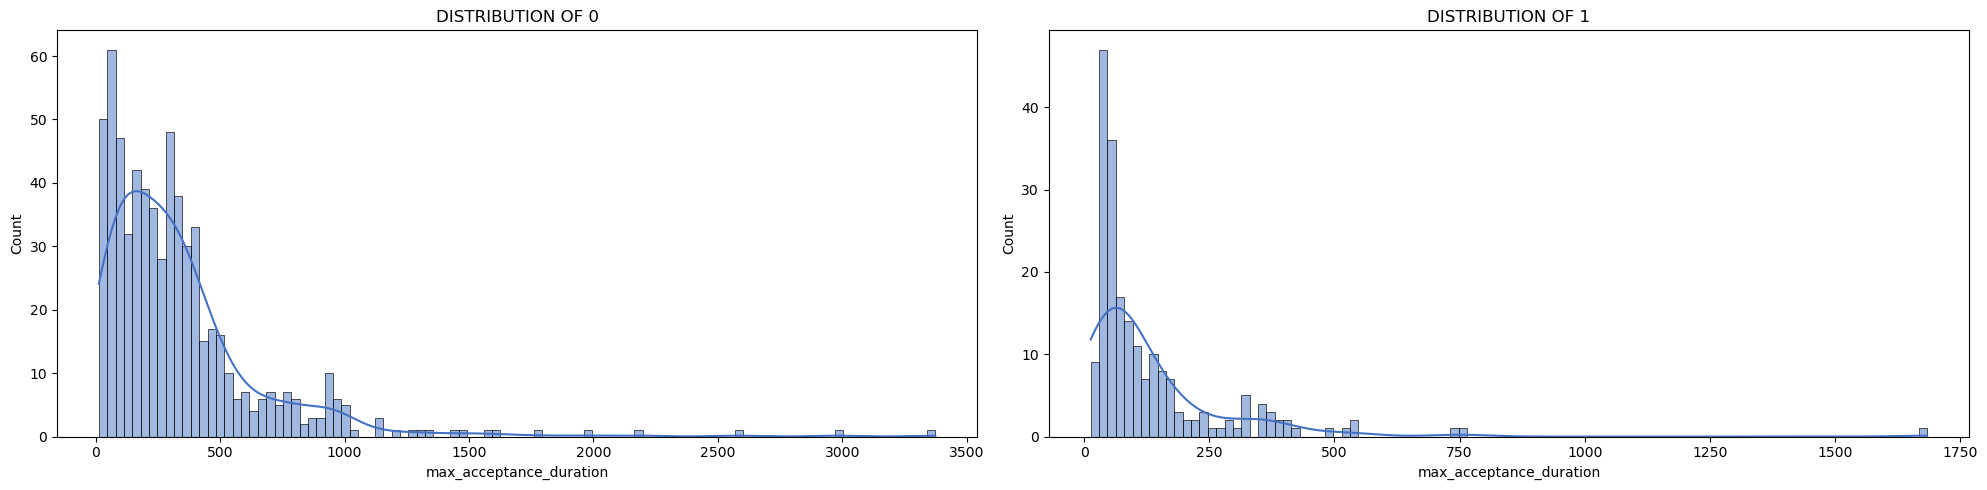

DISTRIBUTION OF AVG_ACCEPTANCE_DURATION


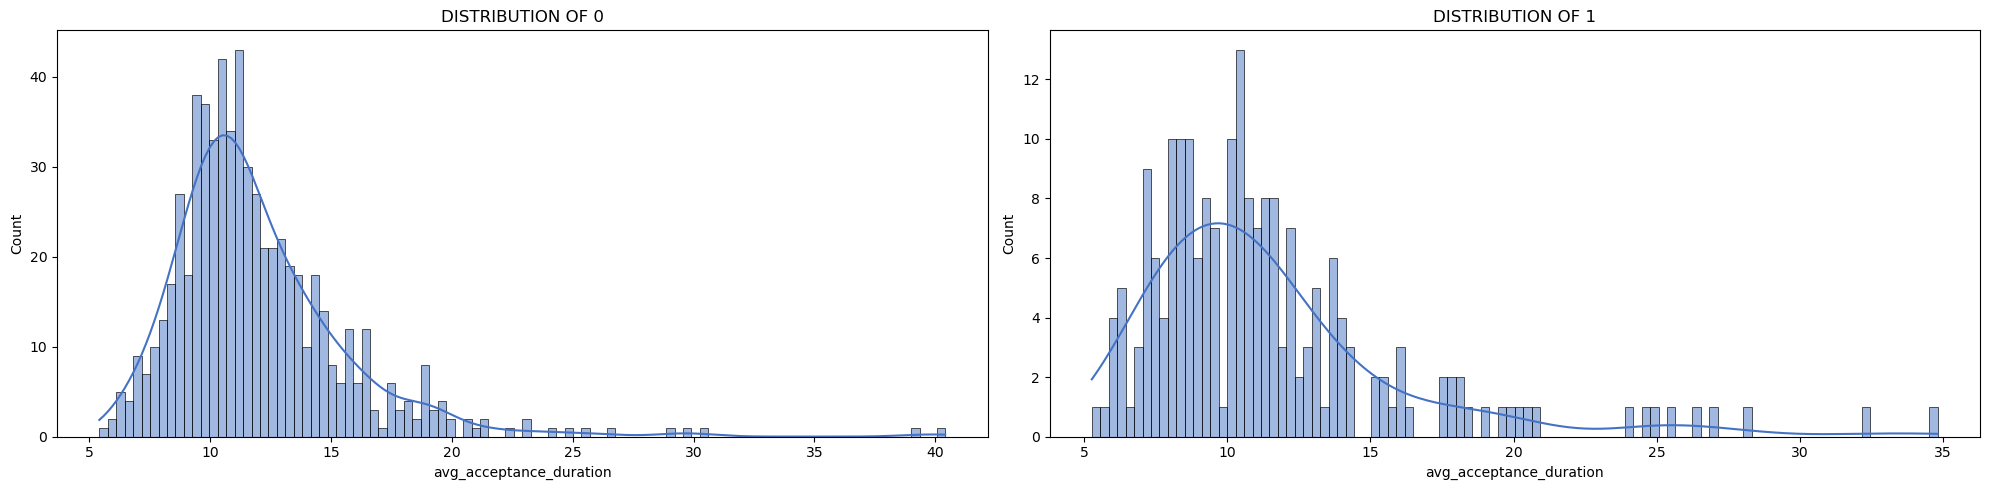

DISTRIBUTION OF MIN_ARRIVAL_DURATION


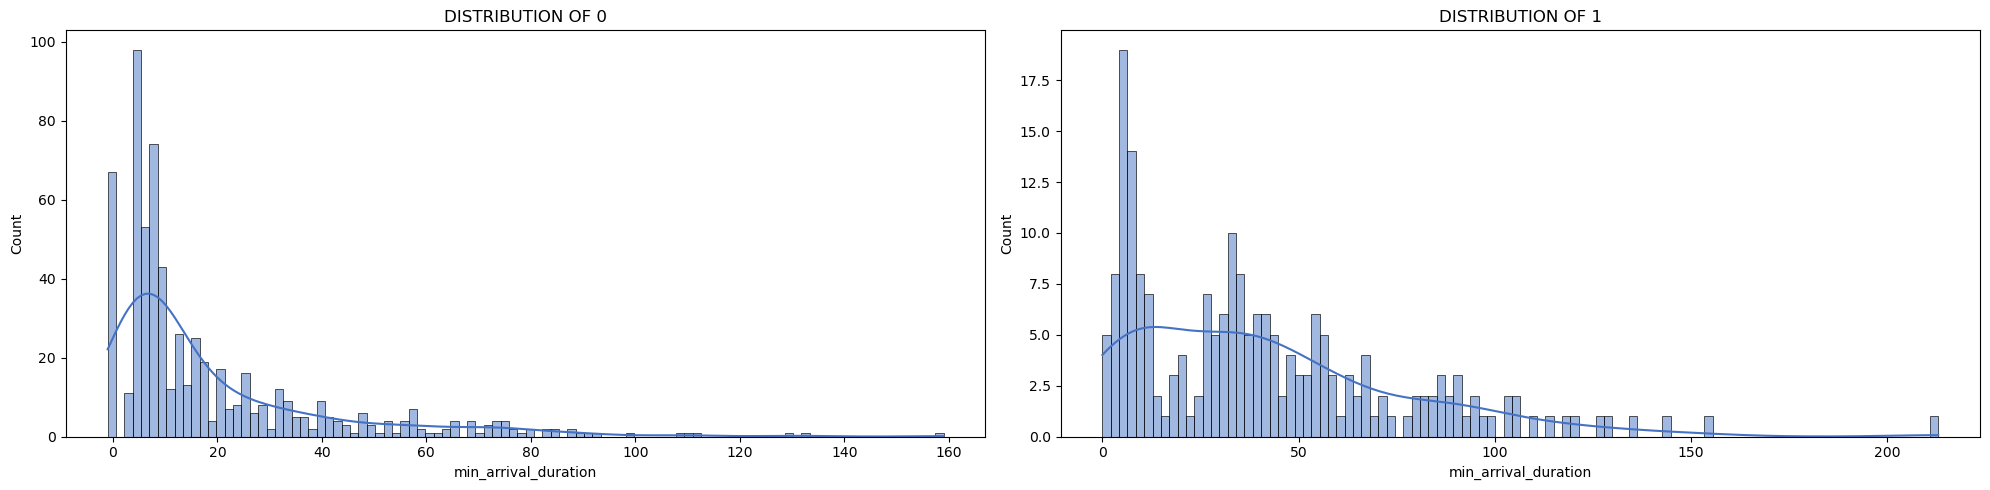

DISTRIBUTION OF MAX_ARRIVAL_DURATION


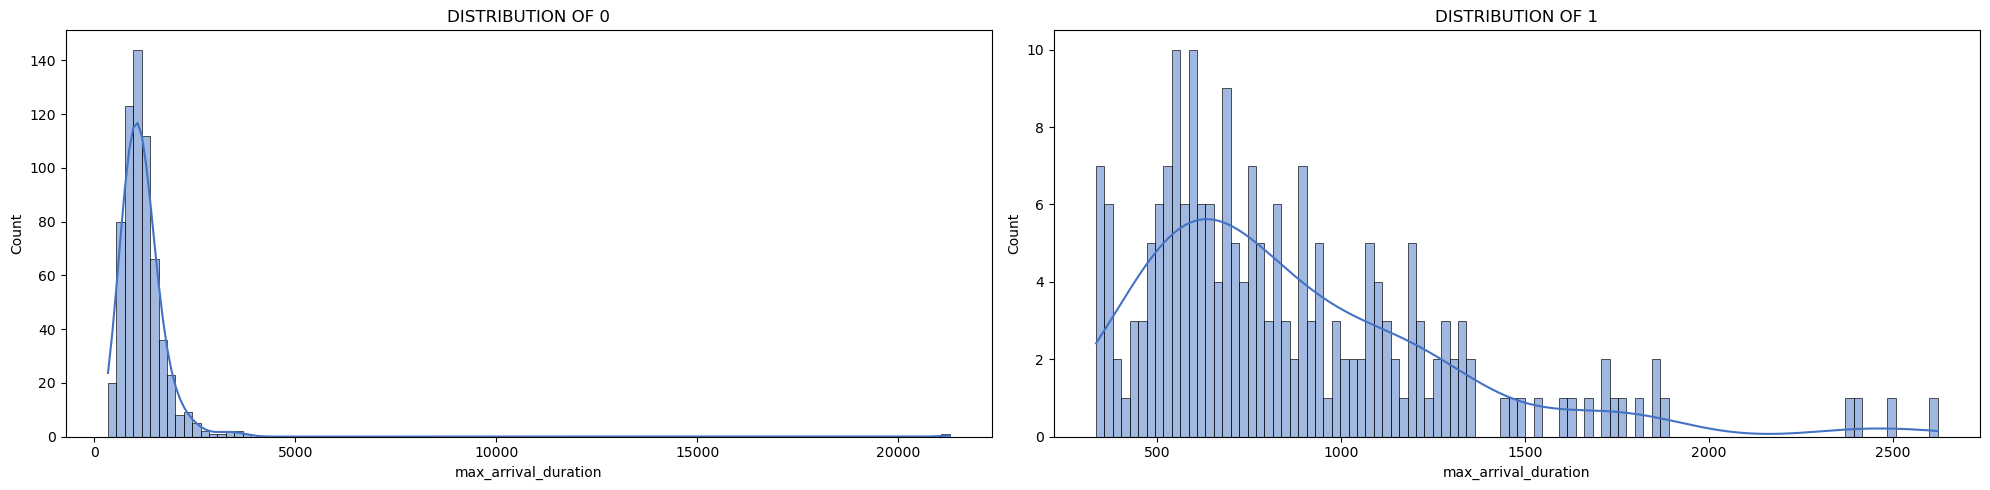

DISTRIBUTION OF AVG_ARRIVAL_DURATION


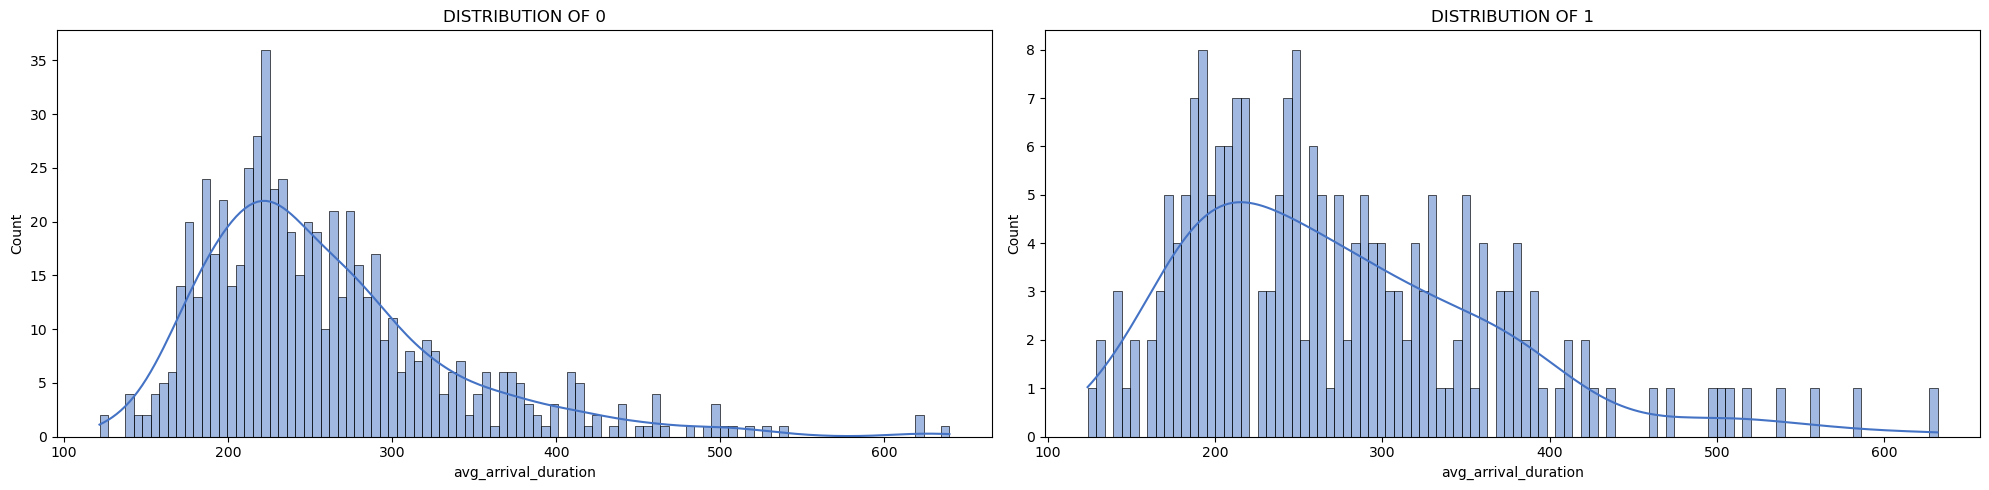

DISTRIBUTION OF MIN_WAIT_DURATION


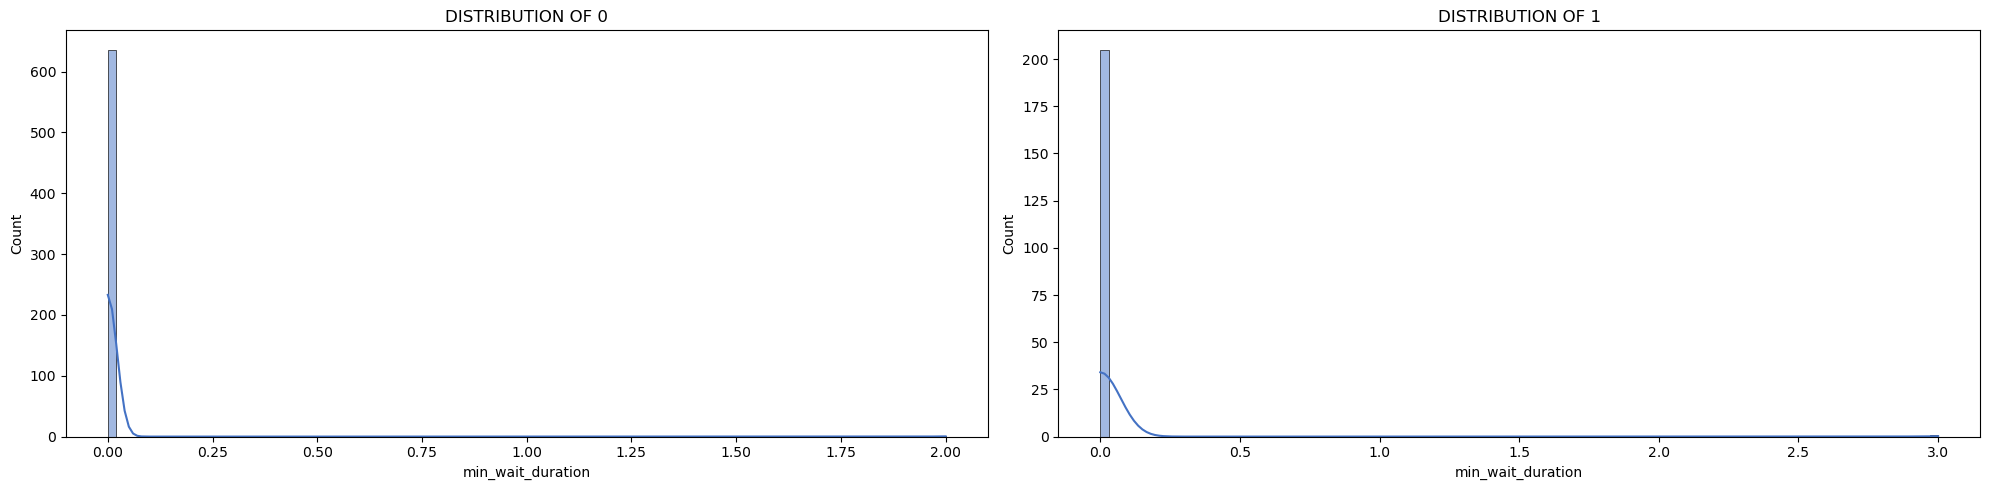

DISTRIBUTION OF MAX_WAIT_DURATION


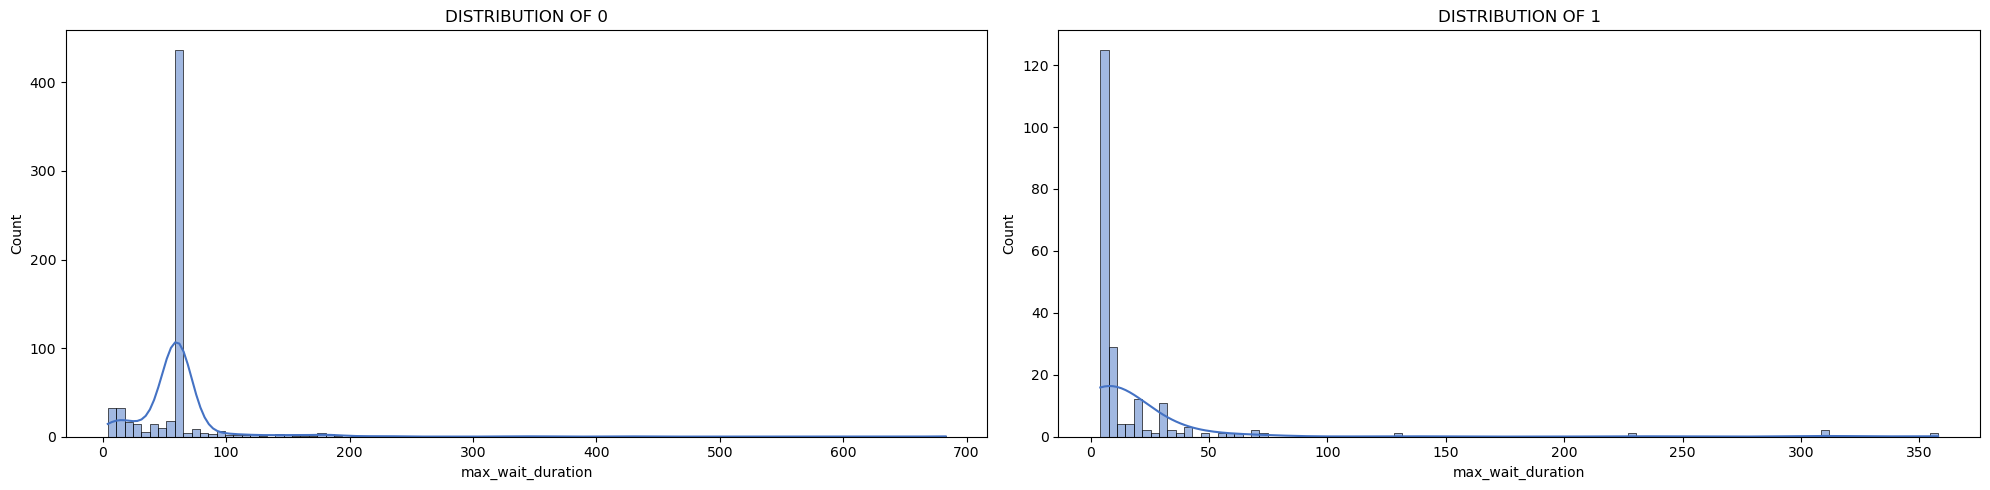

DISTRIBUTION OF AVG_WAIT_DURATION


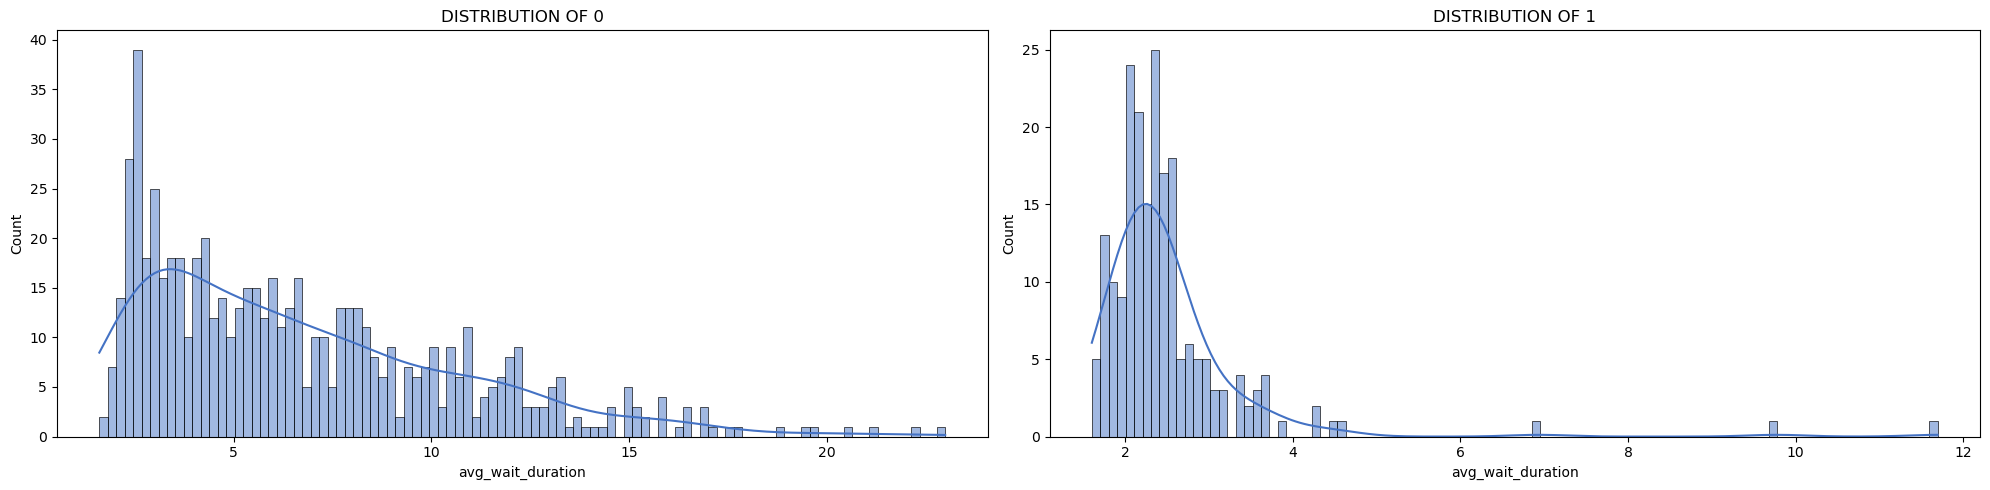

DISTRIBUTION OF AVG_EARNING_PER_RIDE


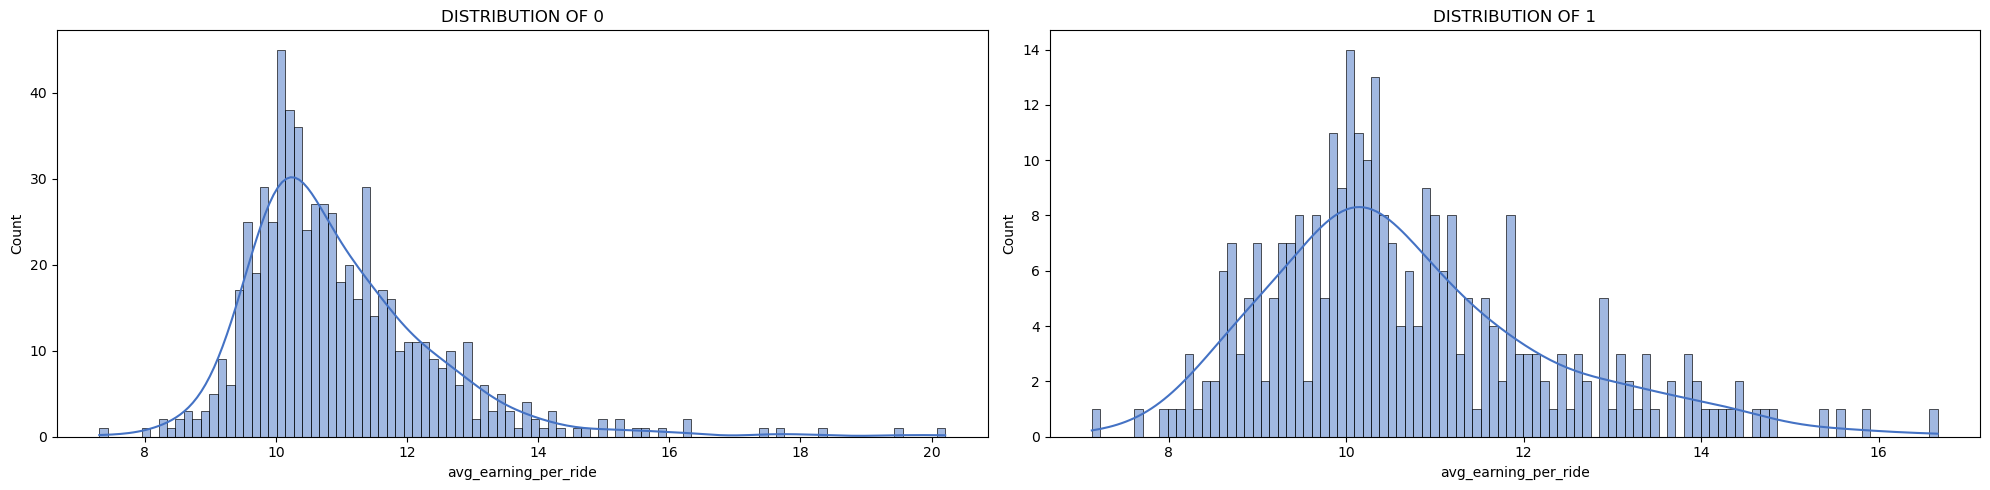

DISTRIBUTION OF MIN_EARNING_RIDE


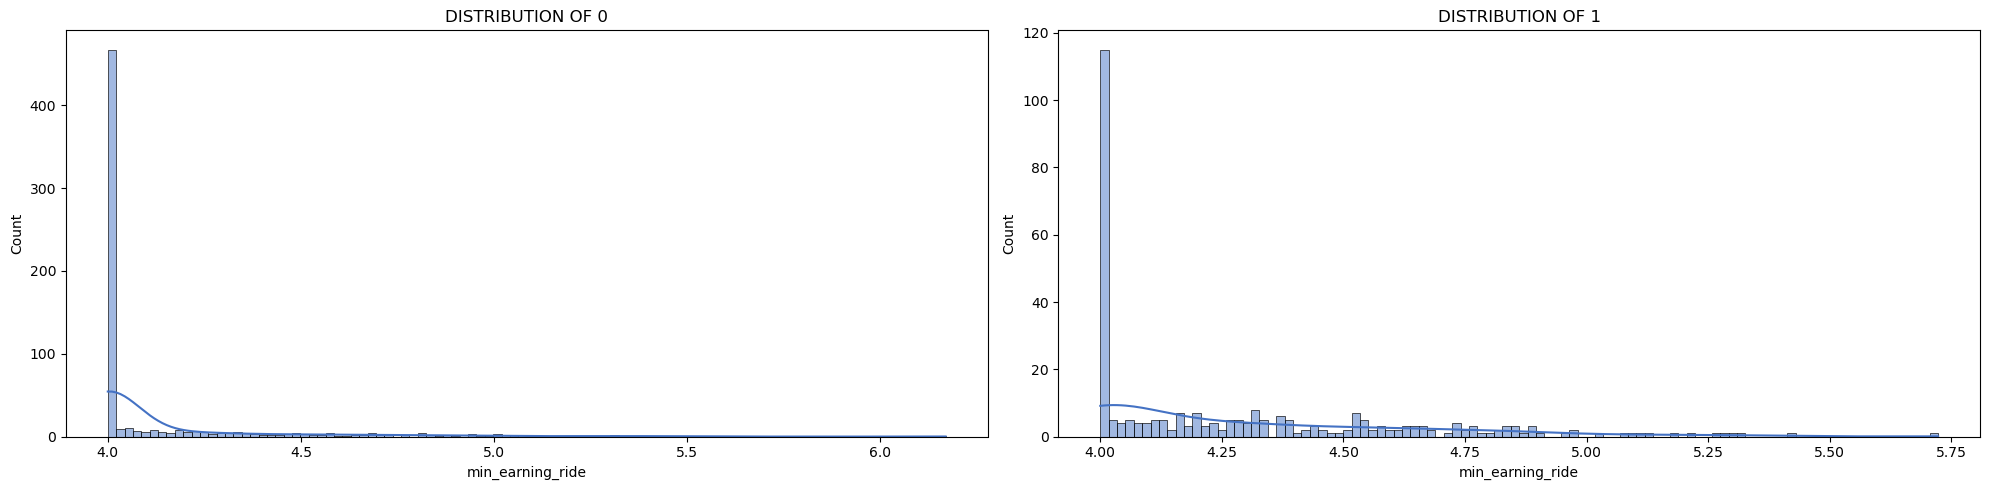

DISTRIBUTION OF MAX_EARNING_RIDE


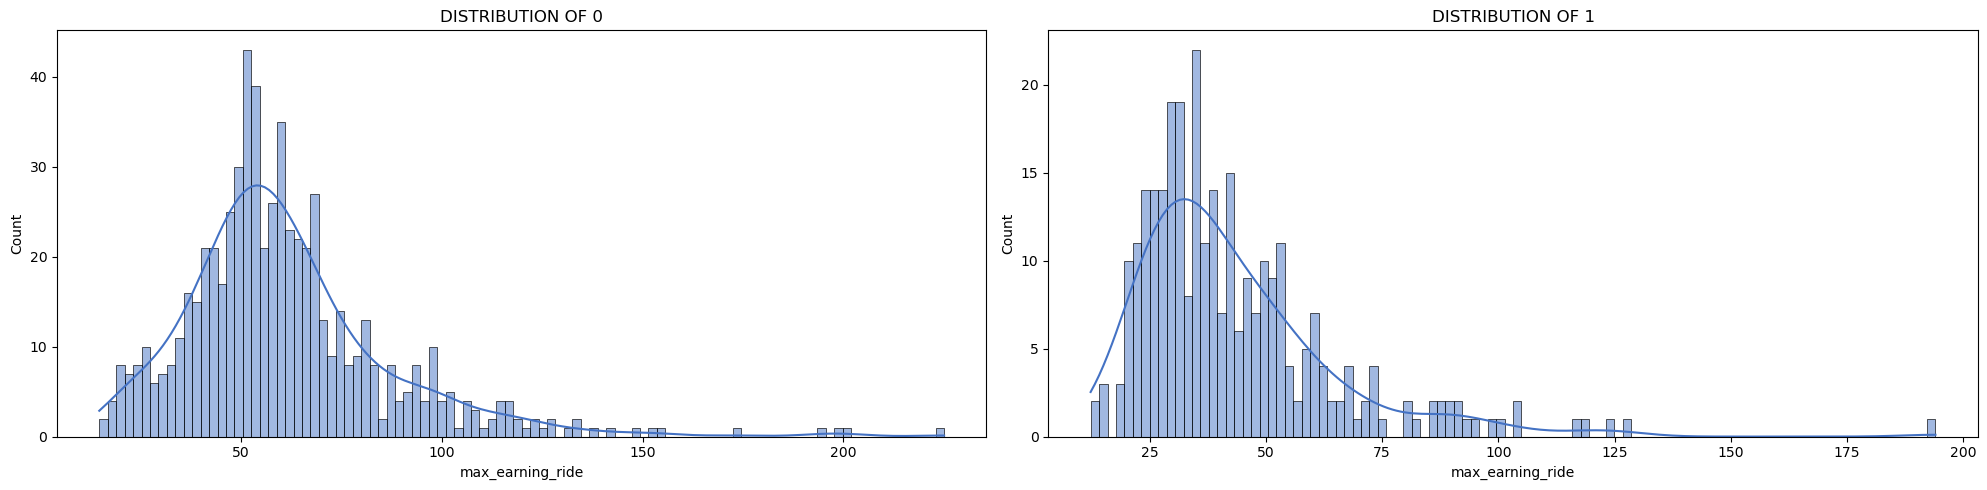

DISTRIBUTION OF EARNINGS_PER_ACTIVE_DAY


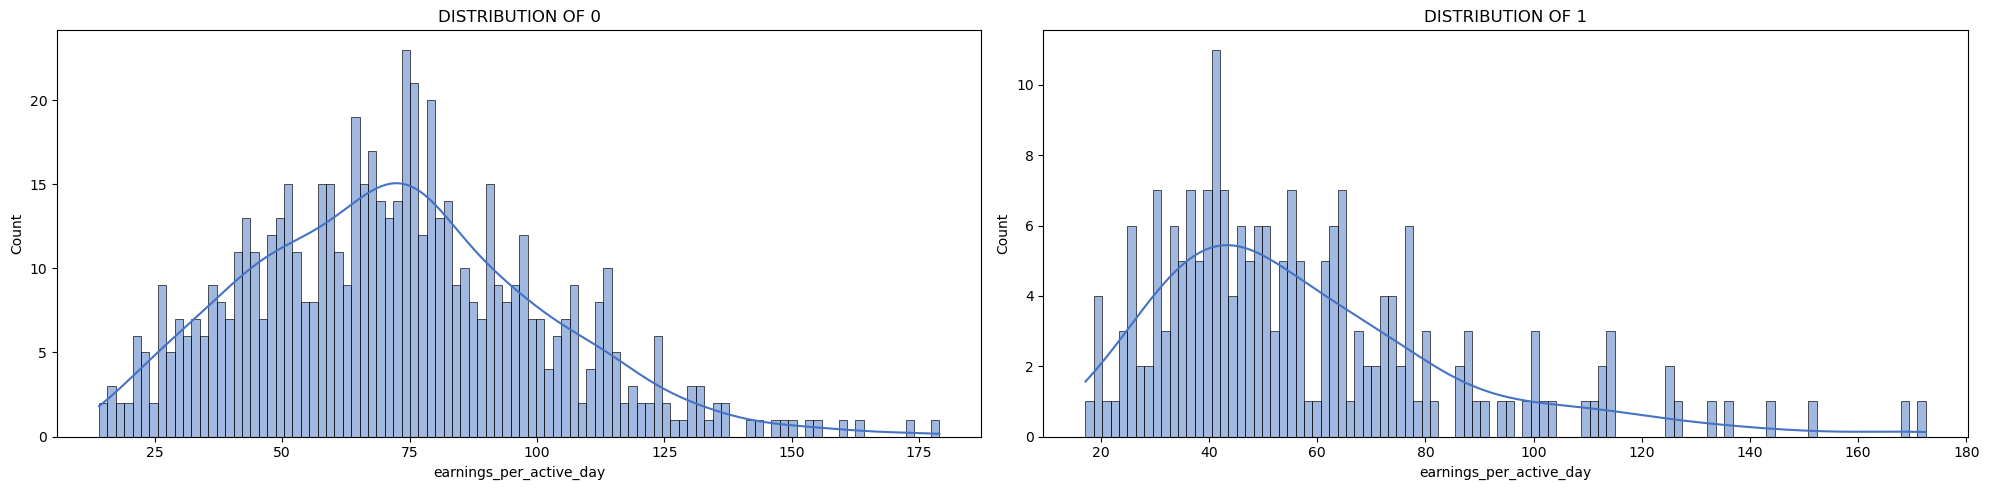

DISTRIBUTION OF RIDE_FREQ_DURING_ACTIVE


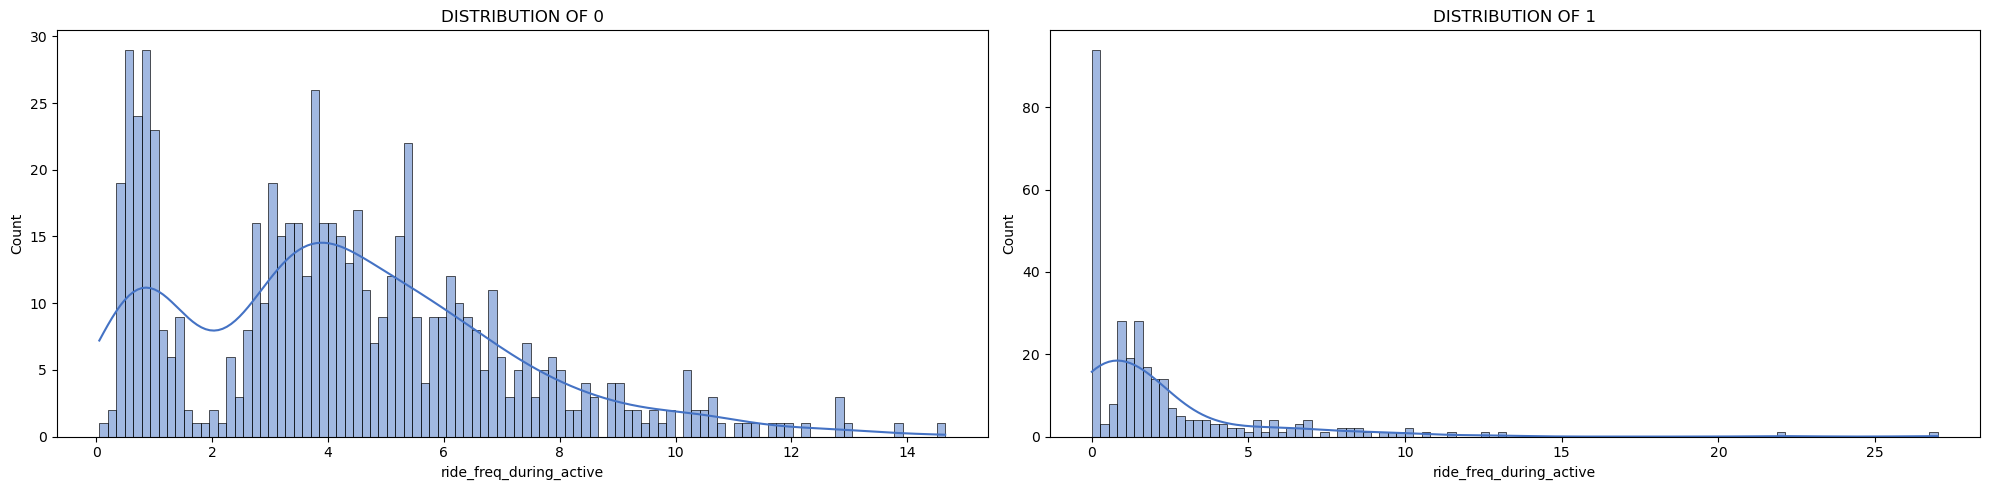

DISTRIBUTION OF AVG_PRIMETIME_MULTIPLIER


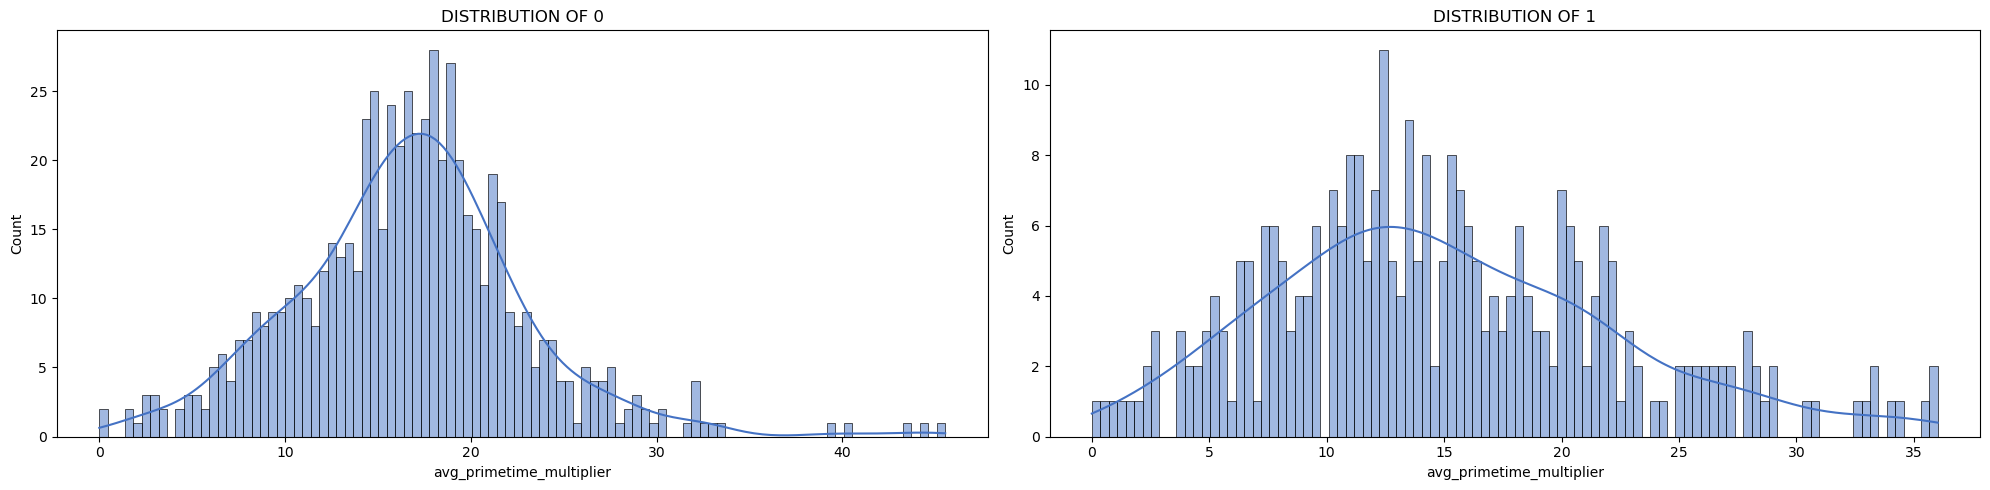

DISTRIBUTION OF NUM_RIDES_IN_1ST_30DAYS


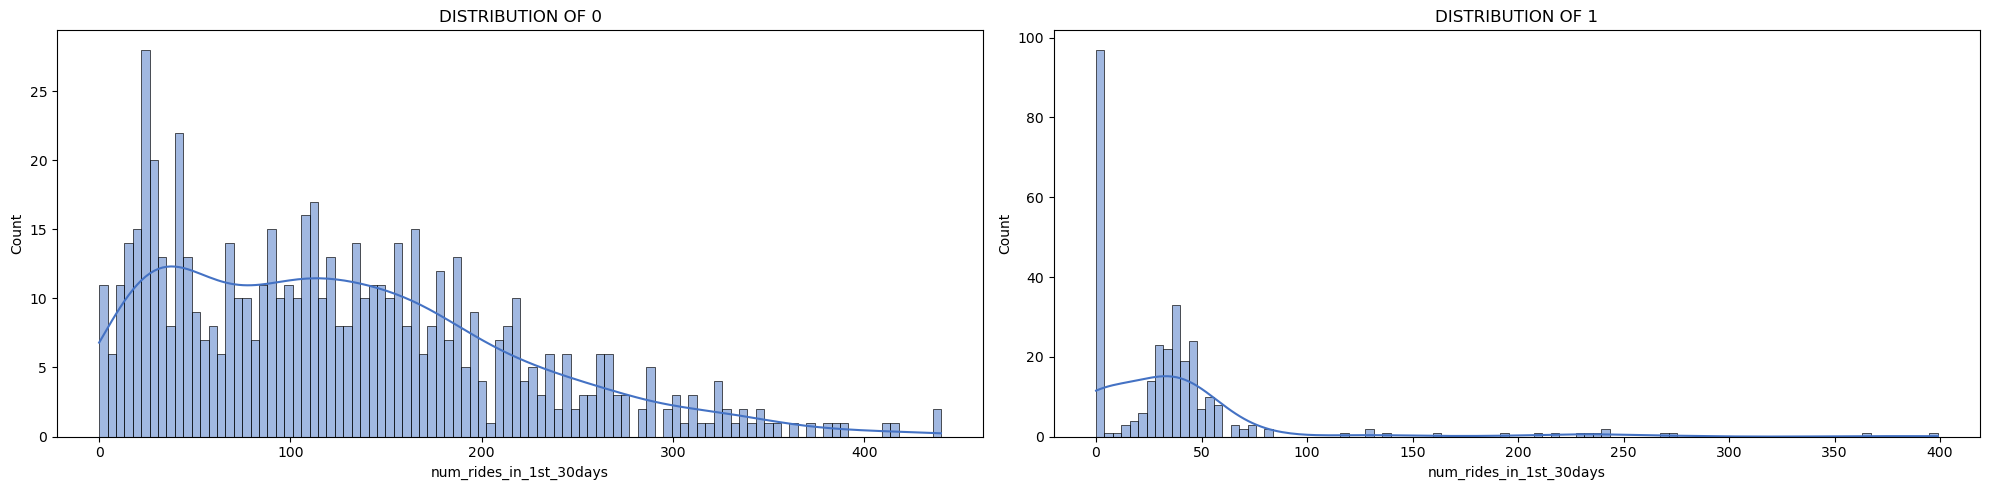

DISTRIBUTION OF N_DAYS_AFTER_ONBOARDING


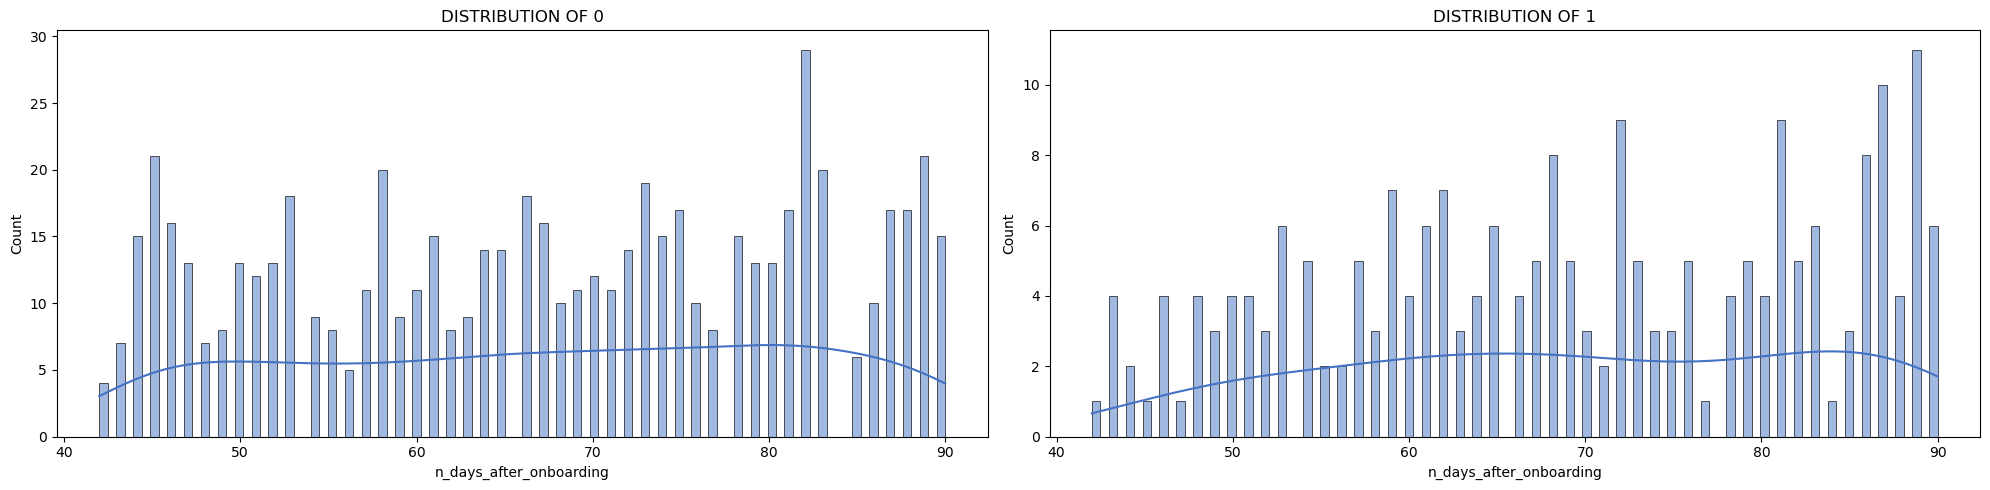

DISTRIBUTION OF N_DAYS_TO_FIRST_DRIVE


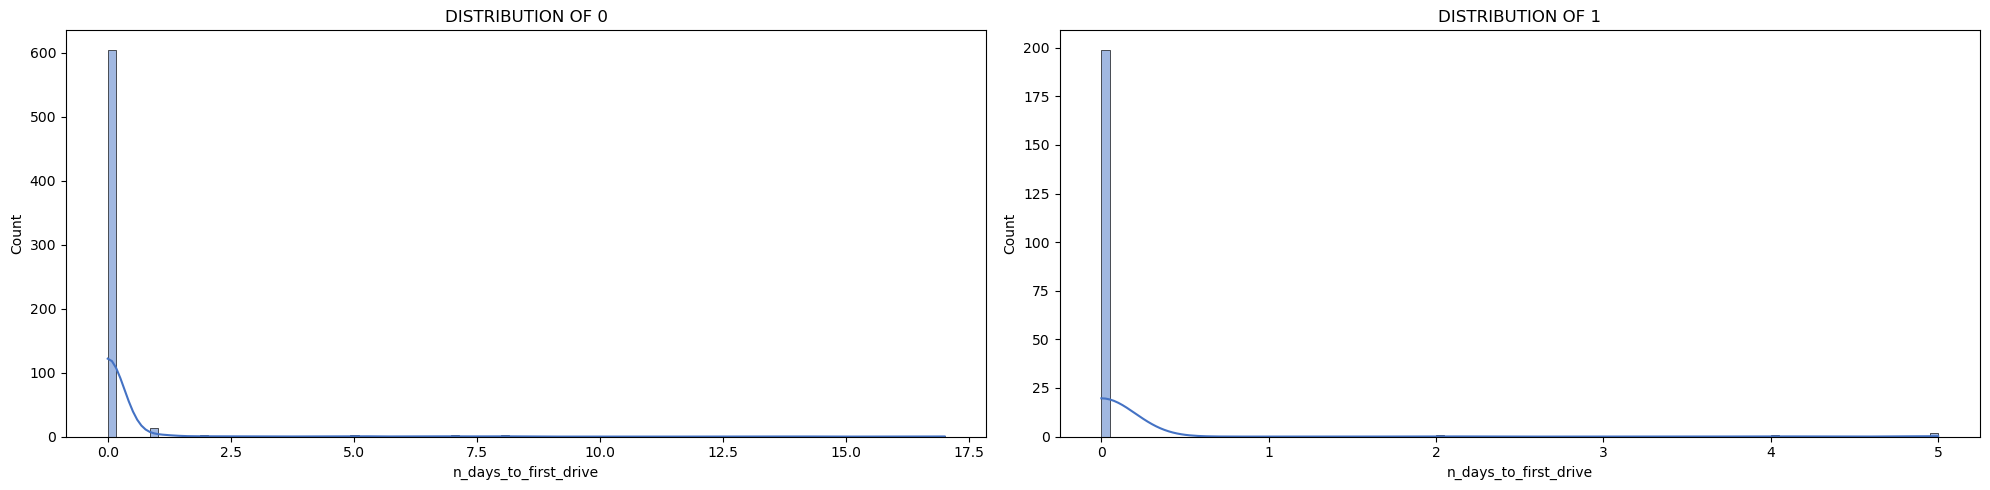

In [26]:
plot_numerical(df, 'churn')

### Visualize relationship between variables

In [27]:
df[['earnings_per_active_day', 'ride_freq_during_active','avg_primetime_multiplier','num_rides_in_1st_30days','avg_wait_duration','churn']].corr()['churn'].sort_values()

num_rides_in_1st_30days    -0.463420
avg_wait_duration          -0.454707
ride_freq_during_active    -0.290139
earnings_per_active_day    -0.210070
avg_primetime_multiplier   -0.108995
churn                       1.000000
Name: churn, dtype: float64

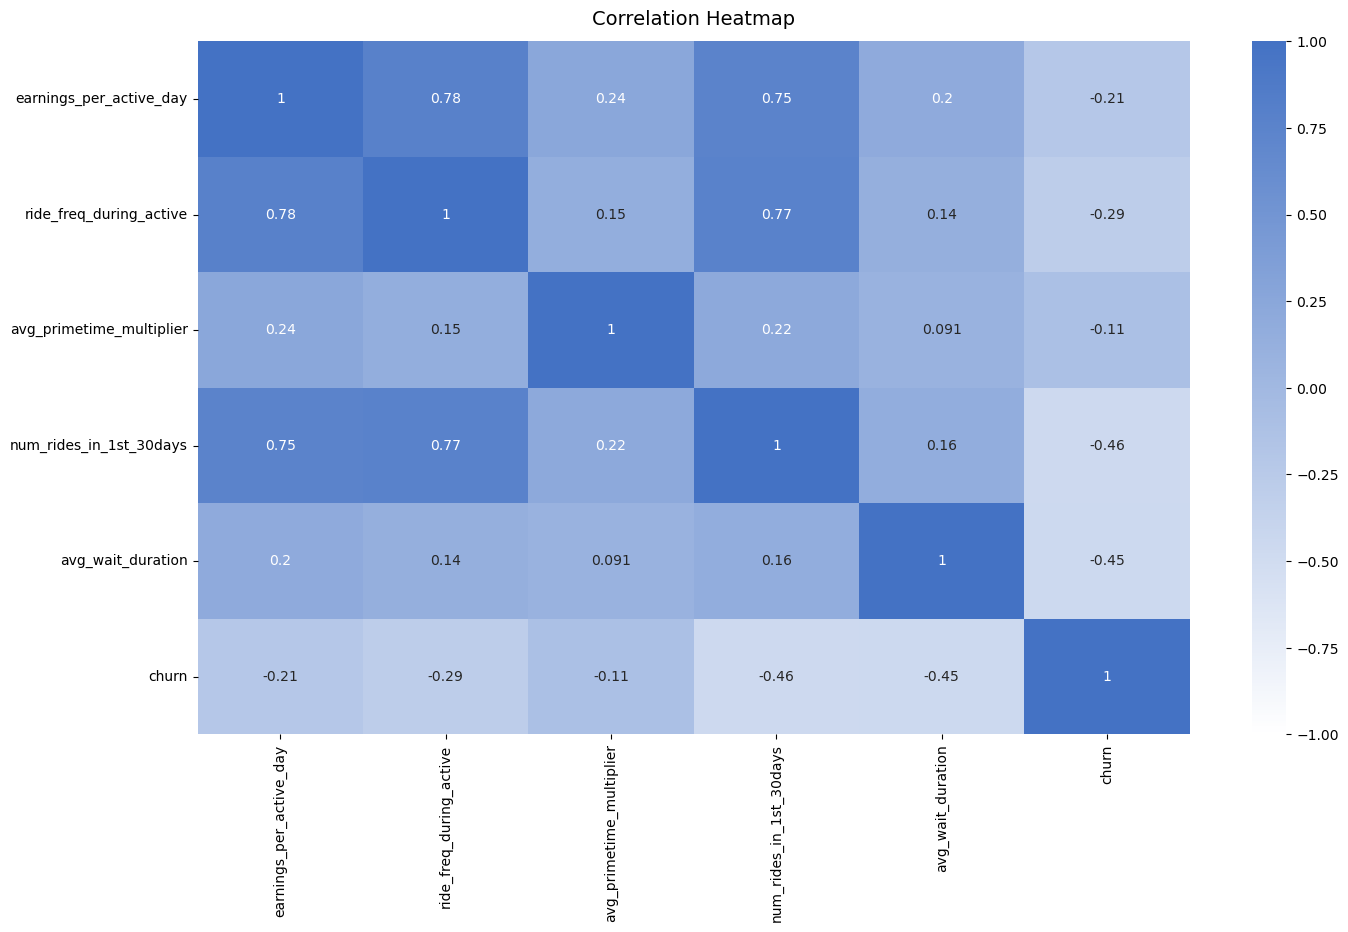

In [28]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df[['earnings_per_active_day', 'ride_freq_during_active','avg_primetime_multiplier','num_rides_in_1st_30days','avg_wait_duration','churn']].corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ffffff", "#4472c4ff"]))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [29]:
df.corr(numeric_only=True)['churn'].sort_values()

day_drive                  -0.577723
num_rides_in_1st_30days    -0.463420
avg_wait_duration          -0.454707
max_wait_duration          -0.341878
max_earning_ride           -0.308069
ride_freq_during_active    -0.290139
max_ride_duration          -0.285173
max_ride_distance          -0.271921
max_acceptance_duration    -0.251565
earnings_per_active_day    -0.210070
avg_primetime_multiplier   -0.108995
max_arrival_duration       -0.108502
avg_earning_per_ride       -0.091258
n_days_to_first_drive      -0.044230
avg_acceptance_duration    -0.037046
min_wait_duration           0.011974
n_days_after_onboarding     0.057331
avg_arrival_duration        0.071836
min_earning_ride            0.240777
min_acceptance_duration     0.265356
min_ride_distance           0.294607
min_arrival_duration        0.331614
churn                       1.000000
Name: churn, dtype: float64

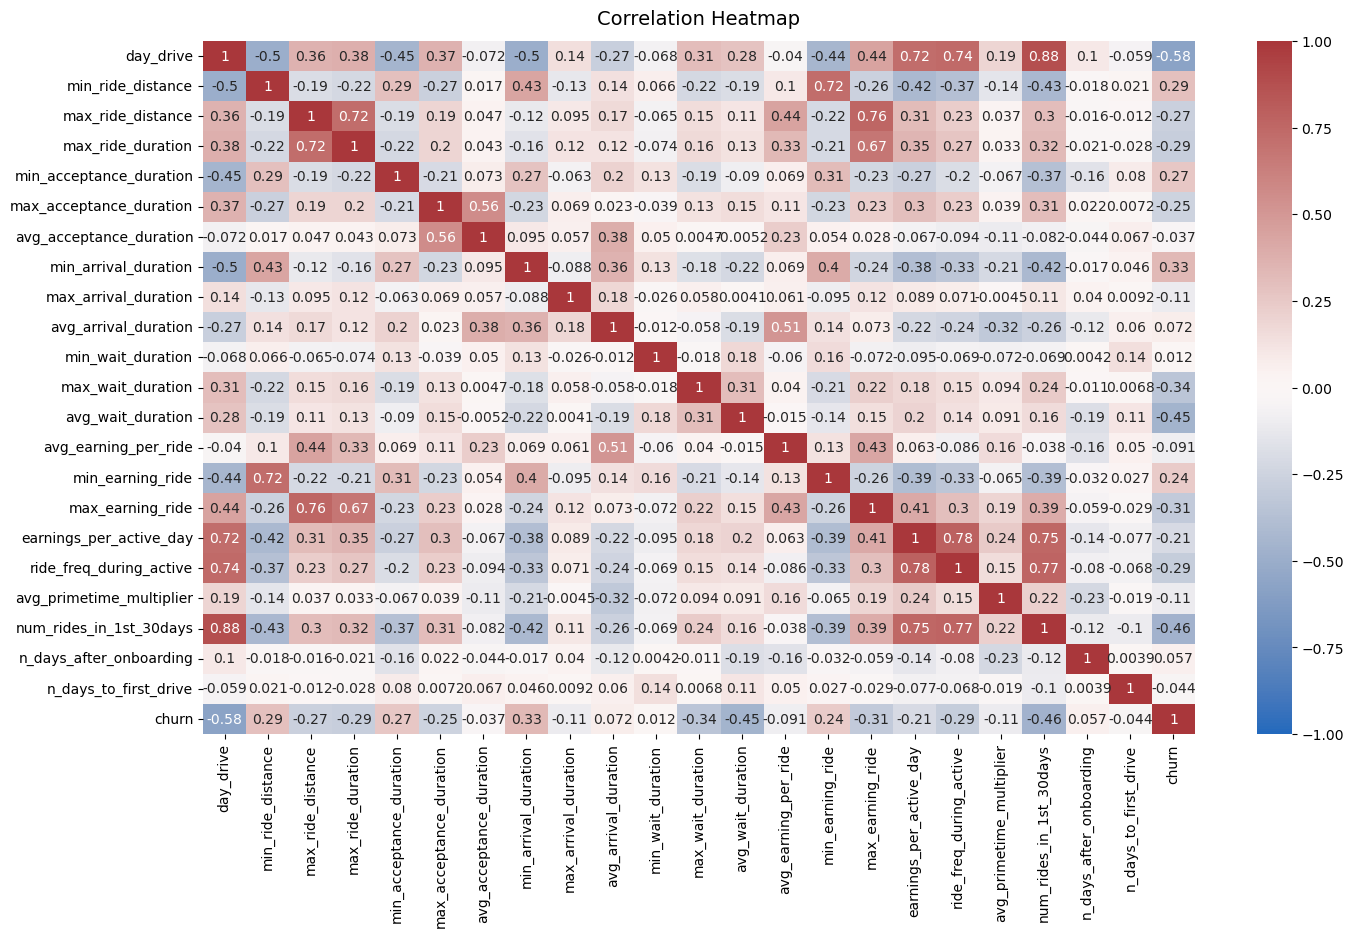

In [30]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## Hypothesis Testing

In [31]:
features = [
    'earnings_per_active_day',
    'ride_freq_during_active',
    'avg_primetime_multiplier',
    'num_rides_in_1st_30days',
    'avg_wait_duration'
]

In [32]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   earnings_per_active_day   844 non-null    float64
 1   ride_freq_during_active   937 non-null    float64
 2   avg_primetime_multiplier  937 non-null    float64
 3   num_rides_in_1st_30days   937 non-null    int64  
 4   avg_wait_duration         844 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 36.7 KB


In [33]:
df.dropna(subset=features, inplace=True)

In [34]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 844 entries, 0 to 936
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   earnings_per_active_day   844 non-null    float64
 1   ride_freq_during_active   844 non-null    float64
 2   avg_primetime_multiplier  844 non-null    float64
 3   num_rides_in_1st_30days   844 non-null    int64  
 4   avg_wait_duration         844 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.6 KB


In [35]:
churned = df[df['churn'] == 1]
retained = df[df['churn'] == 0]

In [36]:
# Perform one-tailed t-tests and print results
for feature in features:    
    # Perform one-tailed t-test (greater)
    t_statistic, p_value = stats.ttest_ind(churned[feature], retained[feature], equal_var=False)
    
    print(f'Feature: {feature}')
    print(f'T-statistic: {t_statistic:.4f}')
    print(f'P-value: {p_value:.4f}')
    print('-' * 40)

Feature: earnings_per_active_day
T-statistic: -6.2482
P-value: 0.0000
----------------------------------------
Feature: ride_freq_during_active
T-statistic: -3.2927
P-value: 0.0011
----------------------------------------
Feature: avg_primetime_multiplier
T-statistic: -2.9399
P-value: 0.0036
----------------------------------------
Feature: num_rides_in_1st_30days
T-statistic: -13.7544
P-value: 0.0000
----------------------------------------
Feature: avg_wait_duration
T-statistic: -24.0583
P-value: 0.0000
----------------------------------------


In [37]:
for feature in features:
    print(f'Feature: {feature}')
    print(f'Churned mean: {churned[feature].mean()}')
    print(f'Retained mean: {retained[feature].mean()}')

Feature: earnings_per_active_day
Churned mean: 57.81744190355581
Retained mean: 72.32020859573728
Feature: ride_freq_during_active
Churned mean: 3.2543437936512305
Retained mean: 4.242691629322267
Feature: avg_primetime_multiplier
Churned mean: 14.82017434754768
Retained mean: 16.678895672015496
Feature: num_rides_in_1st_30days
Churned mean: 53.43689320388349
Retained mean: 126.81661442006269
Feature: avg_wait_duration
Churned mean: 2.5097565496628462
Retained mean: 6.752776956325704


# RFM Analysis

## Load Data

In [38]:
rfm = pd.read_csv('data/rfm.csv')
rfm.head()

,driver_id,days_since_last_drive,ride_freq_during_active,earnings_per_active_day
0,01788cf817698fe68eaecd7eb18b2f72,91,0.0,0.0
1,133faf644d5cfee9460b87eea4367f92,91,0.0,0.0
2,13fe6713788e9b63f57950320f260512,91,0.0,0.0
3,146cd888491dd0f348575244f5bbc24e,91,0.0,0.0
4,1585fa96f0818e8f4d1cf826b332fda4,91,0.0,0.0


In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_id                1020 non-null   object 
 1   days_since_last_drive    1020 non-null   int64  
 2   ride_freq_during_active  1020 non-null   float64
 3   earnings_per_active_day  1020 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 32.0+ KB


In [40]:
rfm.describe()

,days_since_last_drive,ride_freq_during_active,earnings_per_active_day
count,1020.000000,1020.000000,1020.000000
mean,26.460784,5.281667,71.140549
std,34.468108,3.497646,46.845126
min,0.000000,0.000000,0.000000
25%,0.000000,2.900000,40.230000
50%,6.000000,5.380000,72.930000
75%,45.000000,7.602500,100.395000
max,91.000000,17.500000,237.980000


In [41]:
rfm.columns

Index(['driver_id', 'days_since_last_drive', 'ride_freq_during_active',
       'earnings_per_active_day'],
      dtype='object')

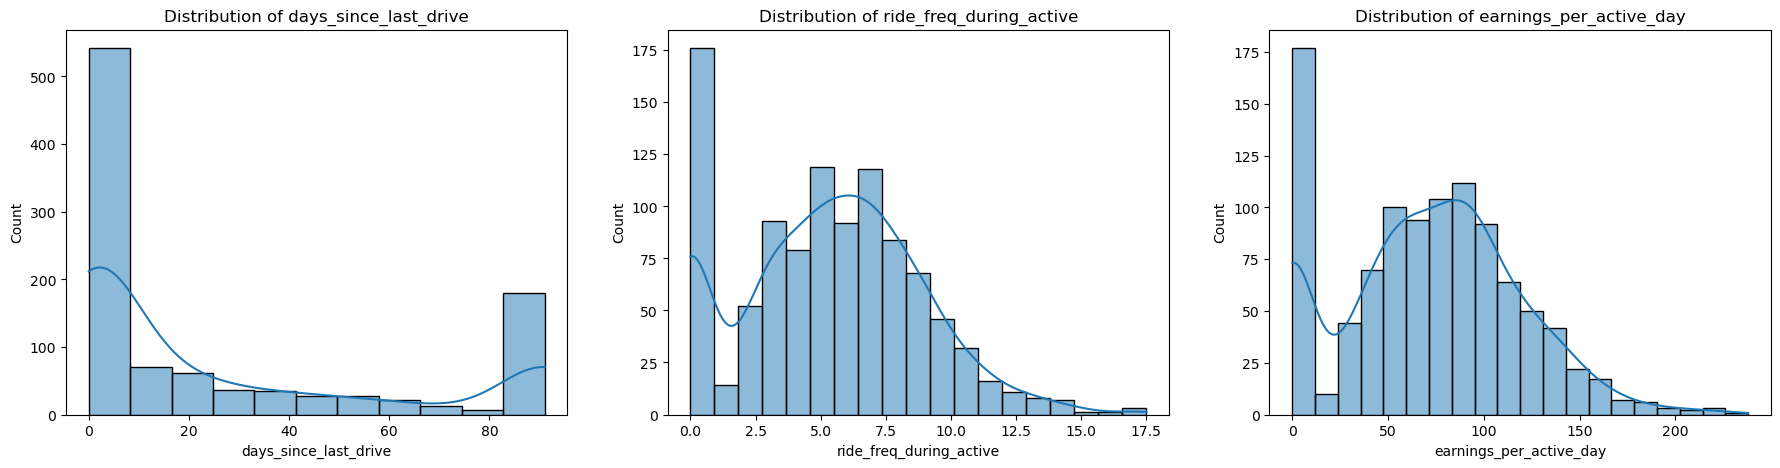

In [42]:
cols = 3
rows = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 5*rows))

# Flatten axes array for easy iteration if more than 1 row and 1 column
if rows * cols > 1:
    axes = axes.flatten()

# Plot distributions for each column
for i, col in enumerate(['days_since_last_drive', 'ride_freq_during_active','earnings_per_active_day']):
    sns.histplot(rfm[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

## Define thresholds

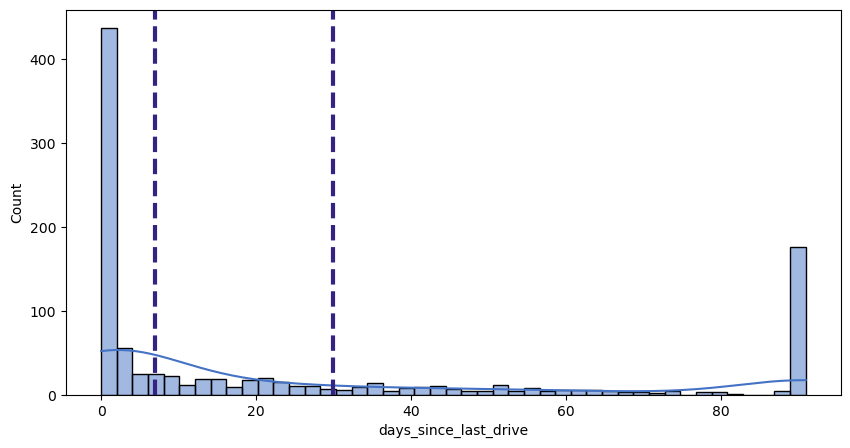

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(rfm['days_since_last_drive'], kde=True, bins=np.linspace(0, 91, 46), color='#4472c4ff')
plt.axvline(x=7, color='#352384', linestyle='--', linewidth=3)
plt.axvline(x=30, color='#352384', linestyle='--', linewidth=3)

In [44]:
rfm['days_since_last_drive'].describe(percentiles=[0.3, 0.4, 0.52, 0.6, 0.69, 0.7, 0.75, 0.79, 0.81])

count    1020.000000
mean       26.460784
std        34.468108
min         0.000000
30%         1.000000
40%         2.000000
50%         6.000000
52%         7.000000
60%        16.400000
69%        31.110000
70%        34.000000
75%        45.000000
79%        59.010000
81%        69.390000
max        91.000000
Name: days_since_last_drive, dtype: float64

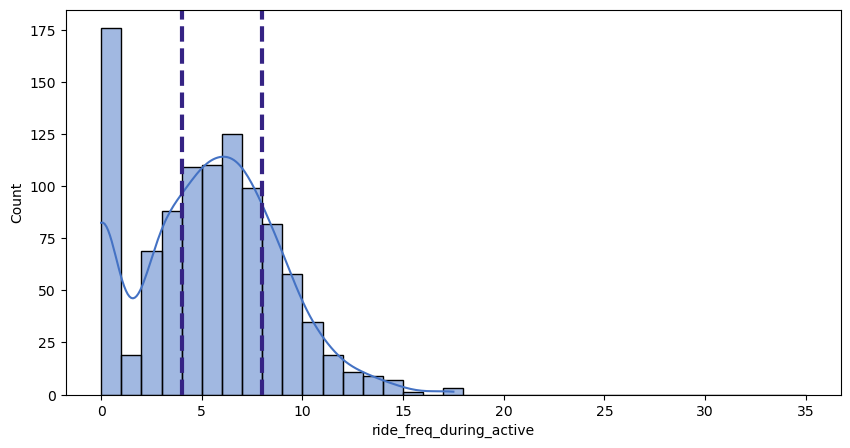

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(rfm['ride_freq_during_active'], kde=True, bins=np.linspace(0, 35, 36), color='#4472c4ff')
plt.axvline(x=4, color='#352384', linestyle='--', linewidth=3)
plt.axvline(x=8, color='#352384', linestyle='--', linewidth=3)

In [46]:
rfm['ride_freq_during_active'].describe(percentiles=[0.35, 0.4, 0.45, 0.5, 0.6, 0.8, 0.9])

count    1020.000000
mean        5.281667
std         3.497646
min         0.000000
35%         4.000000
40%         4.526000
45%         4.960000
50%         5.380000
60%         6.284000
80%         8.180000
90%         9.483000
max        17.500000
Name: ride_freq_during_active, dtype: float64

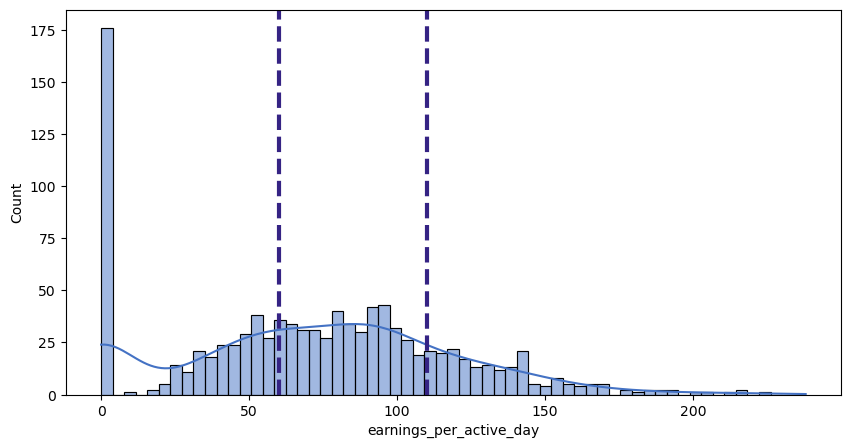

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(rfm['earnings_per_active_day'], kde=True, color='#4472c4ff', bins=np.linspace(0, 230, 60))
plt.axvline(x=60, color='#352384', linestyle='--', linewidth=3)
plt.axvline(x=110, color='#352384', linestyle='--', linewidth=3)

In [48]:
rfm['earnings_per_active_day'].describe(percentiles=[0.35, 0.4, 0.45, 0.5, 0.6, 0.8, 0.85, 0.9])

count    1020.000000
mean       71.140549
std        46.845126
min         0.000000
35%        54.289500
40%        60.304000
45%        66.063500
50%        72.930000
60%        84.458000
80%       109.412000
85%       118.925000
90%       130.984000
max       237.980000
Name: earnings_per_active_day, dtype: float64

# Other analysis

In [49]:
df0 = pd.read_csv('data/eda.csv')
df0.head()

,driver_id,ride_freq_during_active,ride_freq_all_3,total_earning
0,01788cf817698fe68eaecd7eb18b2f72,0.0,0.0,0.0
1,133faf644d5cfee9460b87eea4367f92,0.0,0.0,0.0
2,13fe6713788e9b63f57950320f260512,0.0,0.0,0.0
3,146cd888491dd0f348575244f5bbc24e,0.0,0.0,0.0
4,1585fa96f0818e8f4d1cf826b332fda4,0.0,0.0,0.0


In [50]:
df0.describe()

,ride_freq_during_active,ride_freq_all_3,total_earning
count,1020.000000,1020.000000,1020.000000
mean,3.311012,2.107865,2567.985595
std,3.235885,1.948823,2379.956707
min,0.000000,0.000000,0.000000
25%,0.752435,0.455556,545.897681
50%,2.842305,1.616667,1959.827678
75%,5.201724,3.355556,4116.010203
max,35.000000,10.211111,12350.273237


In [51]:
df0['total_earning'].sum()

2619345.3070037006

In [52]:
df0[df0['total_earning']==0]

,driver_id,ride_freq_during_active,ride_freq_all_3,total_earning
0,01788cf817698fe68eaecd7eb18b2f72,0.0,0.0,0.0
1,133faf644d5cfee9460b87eea4367f92,0.0,0.0,0.0
2,13fe6713788e9b63f57950320f260512,0.0,0.0,0.0
3,146cd888491dd0f348575244f5bbc24e,0.0,0.0,0.0
4,1585fa96f0818e8f4d1cf826b332fda4,0.0,0.0,0.0
...,...,...,...,...
78,f24c7a1f58df6b9e7ee7f01012e601ac,0.0,0.0,0.0
79,f429fcd3fe77e166454f9b27813b07d1,0.0,0.0,0.0
80,f9893308ea5859d7ede4e034086c461c,0.0,0.0,0.0
81,fc857228f75499b2f24b3d547e12b9e9,0.0,0.0,0.0


In [53]:
df0.columns

Index(['driver_id', 'ride_freq_during_active', 'ride_freq_all_3',
       'total_earning'],
      dtype='object')

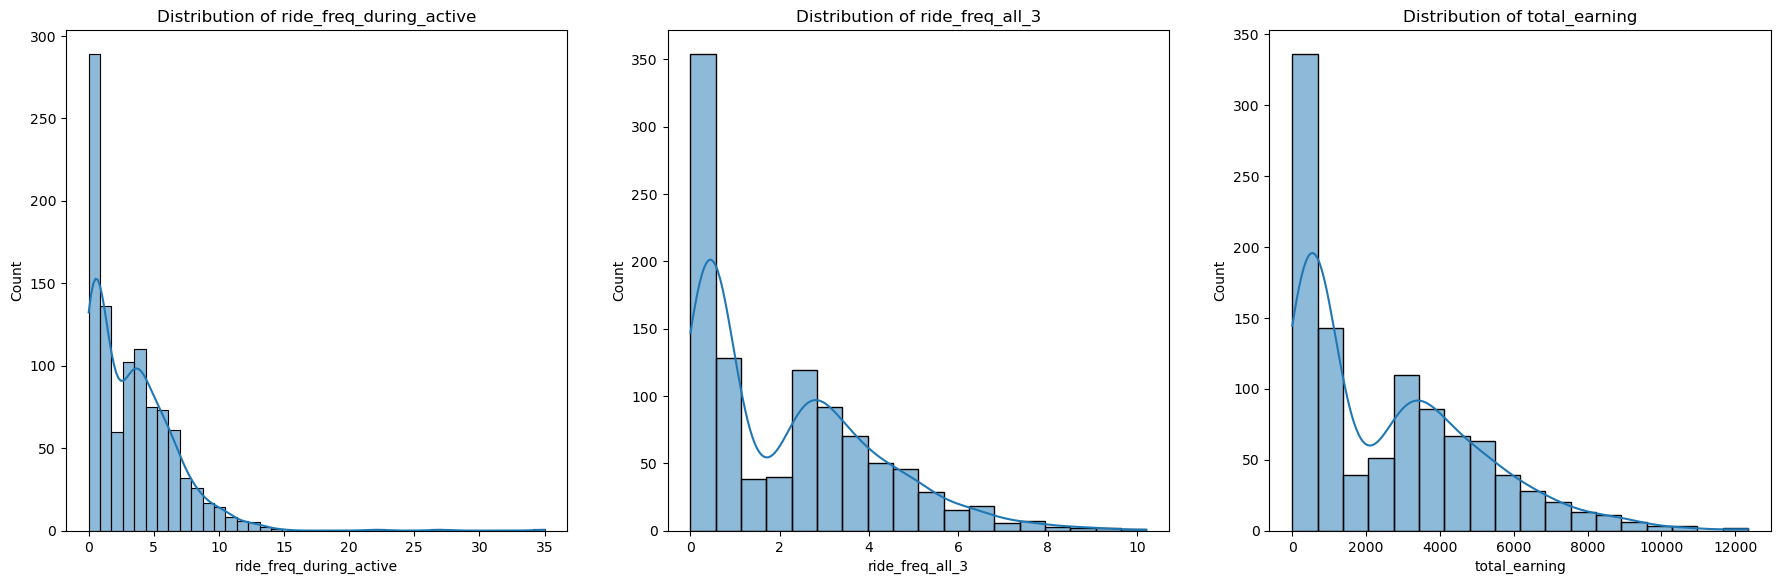

In [54]:
cols = 3
rows = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 6.5*rows))

# Flatten axes array for easy iteration if more than 1 row and 1 column
if rows * cols > 1:
    axes = axes.flatten()

# Plot distributions for each column
for i, col in enumerate(['ride_freq_during_active', 'ride_freq_all_3', 'total_earning']):
    sns.histplot(df0[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

<Axes: xlabel='total_earning', ylabel='Count'>

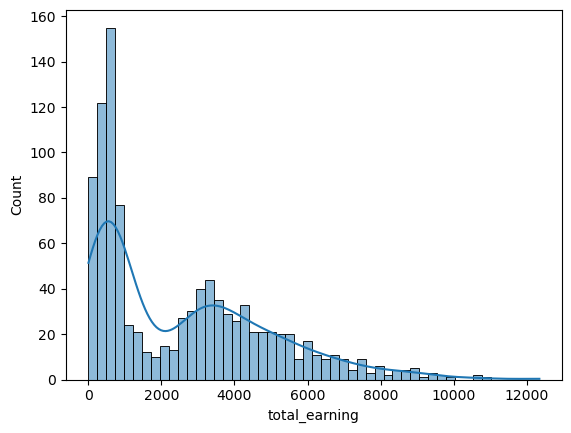

In [55]:
sns.histplot(df0['total_earning'], kde=True, bins=np.linspace(0, 12000, 50))

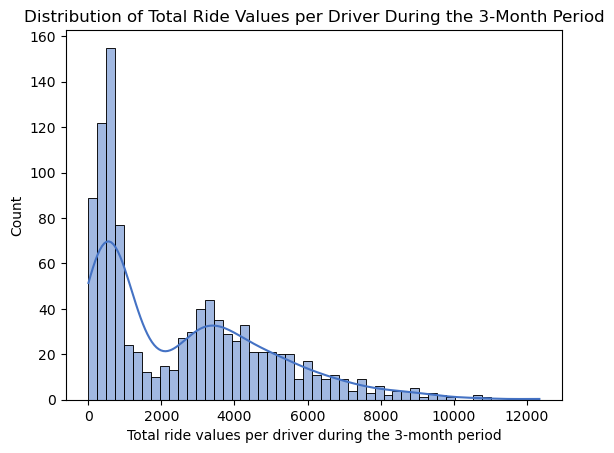

In [56]:
plt.figure()
sns.histplot(df0['total_earning'], kde=True, bins=np.linspace(0, 12000, 50), color='#4472c4ff')

# Rename x-axis label
plt.xlabel('Total ride values per driver during the 3-month period')

# Add title
plt.title('Distribution of Total Ride Values per Driver During the 3-Month Period')

# Show the plot
plt.show()

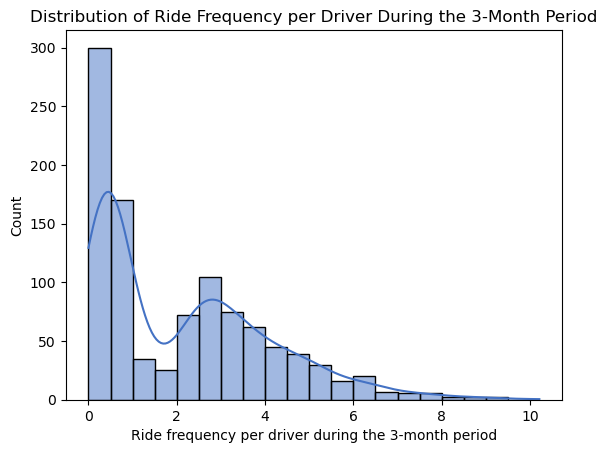

In [57]:
plt.figure()
sns.histplot(df0['ride_freq_all_3'], kde=True, bins=np.linspace(0, 10, 21),  color='#4472c4ff')

# Rename x-axis label
plt.xlabel('Ride frequency per driver during the 3-month period')

# Add title
plt.title('Distribution of Ride Frequency per Driver During the 3-Month Period')

# Show the plot
plt.show()

In [58]:
df0['total_earning'].mean()

2567.9855951016675

In [59]:
df0['ride_freq_all_3'].mean()

2.1078649237472766